In [4]:
from IPython.display import display, HTML
HTML(
    """
    <script
        src='https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js'>
    </script>
    <script>
        code_show=true;
        function code_toggle() {
        if (code_show){
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
        } else {
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
        }
        code_show = !code_show
        }
        $( document ).ready(code_toggle);
    </script>
    <form action='javascript:code_toggle()'>
        <input type="submit" value='Click here to toggle on/off the raw code.'>
    </form>
    """
)

In [2]:
# PySpark imports
from pyspark.sql import SparkSession
from pyspark.sql.types import (StructType, StructField, StringType,
                               BooleanType, LongType, DoubleType, ArrayType,
                               FloatType)
from pyspark.sql import functions as F
from pyspark.sql.functions import udf
from pyspark.sql import Window

# Data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing imports
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Other libraries
import pandas as pd
import re

In [3]:
# Custom Functions
def get_plot(df, xlabel, ylabel, title, rotation=0, horizontal=False):
    plt.figure(figsize=(20, 10))
    
    if horizontal:
        plt.barh(df.iloc[:, 0], df.iloc[:, 1], color='skyblue')
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
    else:
        plt.bar(df.iloc[:, 0], df.iloc[:, 1], color='skyblue')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(rotation=rotation, ha='right')
    
    plt.title(title, fontsize=18)
    plt.tight_layout()
    plt.show()

@udf(BooleanType())
def is_not_stopword(word):
    return word.isalpha() and len(word) > 2 and word not in stopwords

def get_wordcloud(df, year, title):
    df = df.filter(F.col('publication_year') ==  year)
    word_frequencies = df.collect()
    word_freq = {word['word']: word['count'] for word in word_frequencies}

    wc = (WordCloud(width=800, height=400,
                   background_color='white',
                   colormap='Blues')
          .generate_from_frequencies(word_freq))
    
    # Plot the word cloud
    plt.figure(figsize=(20, 10))
    plt.title(title, y=1.02, fontsize=18)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

<div>
<img src='title.jpg' width="100%", max_height="1000">
</div>

<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Abstract</h1></center>
</div>

This project aims to understand the distribution of published works in terms of different categories and factors in OpenAlex. OpenAlex is an open source platform that contains different forms of published works ranging from research literature to different academic journals in different institution all over the world. With this dataset, our goal is to understand the trends and patterns that we may garnered specifically in different fields such as:

- Author and Institution analysis: By analyzing the different constribution made by the authors and institutions we may identify the profile of the leading researchers and institutions.
- Categorical Distribution: understanding the different distribution of published works in different fields and domain.
- Temporal Trends: We examine the evolution of published wokrs over the years. This could in the form of number of publication per year, common use words per year, and so on.
- Citation and Score impact: We examine the number of citation and `primary_score` made by OpenAlex. With this we may know which among institutions annd authors has a significant contribution in their respective field. 

<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Introduction</h1></center>
</div>

Nowadays, scientists and researchers find themselves relying on surfing the web to access information to do their work - identifying potential gaps of knowledge to pursue or finding relevant and related literatures for their current studies. The shift to online resources has made the  painstakingly manual job of going through books and articles to a more efficient and streamlined process of just viewing it online, making it easier to do research. However, the consequence of this improvement of the quality of life is the growing amount of scholarly publications available online.

In 2014, Khabsa and Giles estimated the number of scholarly documents written in english that is available in the internet during that time to be 114 million. This is celebrated as a milestone for how far the academic endeavors had become. However, that number is sure to have grown exponentially a decade later and this continuous increase in volume of published works highlights the need for systems to manage and analyze this information.

<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Problem Statement</h1></center>
</div>

With the number of scholarly articles published each year, the academic landscape had becoming more vast and complex, that is to be expected since there is the continuous evolution of 
academic desciplines. Despite having multiple open sources platformm for published works, the need to analyse the  distribution of published works in different categories and factors is still essntial for the academic landscape specficially in the areas of:

- Categorical Disparaties: To understand how the published works were spread among all categories.
- Temporal Dynamics: Identifying trends in different subjects as the academe landscape evolves overtime
- Influence of Key Contributors: Author and Institution profiling will help us understand how these contributors shape the academe landscape.



<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Motivation</h1></center>
</div>

The forefront of advancing ones knowledge and innovation is via different academic published works that is created by the academicians. Although the amount of publication works just only kept on increasing, it doesn't mean that distribution and quality of these published works, by leveraging the available OpenAlex dataset we may be able to generate insights that could be beneficial to the researches, policymakers, and academic instiutions.

<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Data Description</h1></center>
</div>

### Data Source

We obtained the OpenAlex dataset from the publicly available dataset JOJIE under the Asian Institute of Management (AIM). Access to the dataset was facilitated via the path shown in the image below. The raw input data to be used in our analysis amounts to a total size of 21 GB.

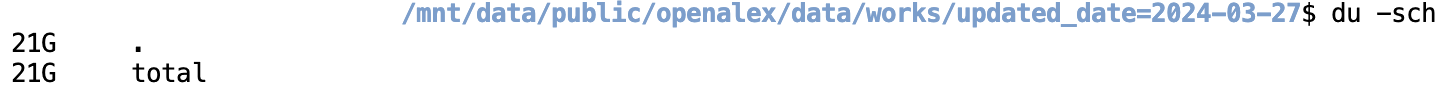

### Data Scope and Limitation
Our project will only focus on the `works` section of the dataset. This comprises the scholarly documents such as articles, books, theses, etc., including the metadata. In addition, the project will focus on the updated portion, specifically the contents on the `updated_date=2024-03-27` folder. Finally, we will only limit our analysis on published works that has english language.

### Data Overview
Our raw data comprises 13,435,534 rows and 44 columns. Table 1 shows the overview of the original dataset.

| Column Name                 | Description                                                                      | Column Name                 | Description                                                                      |
|-----------------------------|----------------------------------------------------------------------------------|-----------------------------|----------------------------------------------------------------------------------|
| abstract_inverted_index     | Index of abstracts for the publication.                                          | authorships                 | Authorship information for the publication.                                       |
| apc_list                    | APC (Article Processing Charges) information for the publication.                 | apc_paid                    | Paid APC information for the publication.                                         |
| best_oa_location            | Information about the best open access location for the publication.              | biblio                      | Bibliographic information about the publication.                                  |
| cited_by_api_url            | URL of an API endpoint to retrieve works citing this publication.                 | cited_by_count              | Number of works citing this publication.                                          |
| concepts                    | Concepts associated with the publication.                                         | corresponding_author_ids    | IDs of corresponding authors for the publication.                                  |
| corresponding_institution_ids| IDs of corresponding institutions for the publication.                             | countries_distinct_count    | Count of distinct countries associated with the publication.                       |
| counts_by_year              | Citation counts for each year.                                                    | created_date                | Date the publication was added to the dataset.                                    |
| display_name                | Title of the publication.                                                         | doi                         | Digital Object Identifier (DOI) for the publication.                               |
| fulltext_origin             | Origin of the full text of the publication.                                       | grants                      | Information about grants associated with the publication.                         |
| has_fulltext                | Indicates whether the publication has full text available.                         | id                          | Unique identifier for the publication.                                            |
| ids                         | Various identifiers for the publication, including DOI and OpenAlex ID.            | indexed_in                  | Databases in which the publication is indexed.                                    |
| institutions_distinct_count| Count of distinct institutions associated with the publication.                    | is_paratext                 | Indicates whether the publication is a paratext (e.g., editorial material).        |
| is_retracted                | Indicates whether the publication has been retracted.                              | keywords                    | Keywords associated with the publication.                                          |
| language                    | Language of the publication.                                                       | license                     | License under which the publication is distributed.                               |
| locations                   | Information about publication locations, including open access status and URLs.    | locations_count             | Count of locations associated with the publication.                                |
| mesh                        | Medical Subject Headings (MeSH) terms associated with the publication.             | open_access                 | Information about the open access status of the publication.                       |
| primary_location            | Information about the primary publication location.                                | primary_topic               | Primary topic of the publication.                                                  |
| publication_date            | Publication date of the work.                                                      | publication_year            | Publication year of the work.                                                      |
| referenced_works            | Publications referenced by the work.                                               | related_works               | Related works, such as similar publications.                                       |
| sustainable_development_goals| Sustainable Development Goals associated with the publication.                    | topics                      | Topics associated with the publication.                                            |
| title                       | Alias for the display_name column, containing the title of the publication.        | type                        | Type of publication (e.g., journal article, book chapter).                         |
| type_crossref               | Type of publication according to Crossref.                                         | updated_date                | Date the publication record was last updated in the database.                      |

<center><b>Table 1. OpenAlex Data Overview</b></center>

<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Methodology</h1></center>
</div>

<div style="background-color: white; padding: 2px;">
<left><h3 style="color: #749FCC; font-family:Arial; font-weight:bold"> Overview</h3></left>
</div>

<div>
<img src='methods.png' width="100%", max_height="1000">
</div>

<center><b>Figure 1. Methodology Overview</b></center>

The figure shown above gives us the overview of the methodology that will be done in this project.
- Data Collection: Retrieve and loadupdated=2023-03-27 data from works section of OpenAlex dataset via Jojie
- Data Exploration and Processing: Explore dataset for understanding its structure and perform necessary processing.
- Exploratory Data Analysis: Perform EDA to address the problem statement, and identify patterns/trends.
- Results: Summarize the insights from the EDA, and offer recommendations based on the insights derived.

<div style="background-color: white; padding: 2px;">
<left><h3 style="color: #749FCC; font-family:Arial; font-weight:bold">Detailed</h3></left>
</div>

## Data Collection

The OpenAlex data was collected via Jojie, since it was a Json file, we loaded a single dataset first to acquire the schema of the dataset. We have done this because loading a dataset with a fixed schema is much faster compared to loading the expected dataset due to having a predefined structure of the dataset. Moreover, we have utilized the documentation from OpenAlex api (OpenAlex, n.d.) to generate more schema that we needed for this project. Finally, the schema was used to read the Json files from `/mnt/data/public/openalex/data/works/updated_dates=2024-03-27`, afterwards we saved it as a temporary parquet file named `oa`.

## Data Exploration and Cleaning

From the parquet file `oa`, we selected the different columns or data that we need. We have done this so that we can have a data that is in tabular form and the selected columns were based on the problem statement that we defined. Table 2 shows the different columns that are expected to be used. 

| Variable                                         | Description                                            |
|--------------------------------------------------|--------------------------------------------------------|
| title                                            | Title of the work                                      |
| authorships.author.id                            | Identification of the authors                          |
| authorships.author_position                      | Position of the author                                 |
| publication_year                                 | Publication year of the work                           |
| corresponding_institution_ids                    | Institution where it was published                     |
| type                                             | Type of work                                           |
| primary_topic.field.display_name                 | Field of the published work                            |
| primary_topic.domain.display_name                | Domain of the published work                           |
| primary_topic.score                              | Score of the published work                            |
| sustainable_development_goals.display_name       | Corresponding Sustainable Development Goals            |
| sustainable_development_goals.score              | Score of Sustainable Development Goals                 |
| keywords.display_name                            | Keywords related to this study                         |
| updated_date                                     | Date of the update of this work                        |
|language                                          | Language were the published work is written            |
<center><b>Table 2. Expected Columns to be used </b></center>

Once we tabulated our dataset, we started our cleaning process:

For the column `title`: based from our exploration some of expected rows are not a title, rather it was a subheading of an atricle, to solve this problem we based our solution in the researchgate forum and according the academian a published work title should have at least 5 words. So we drop all rows that has less than or equal 4 words in their title.

For the columns `authorships.author.id` and `corresponding_institution_ids`: we noticed that its datatype are string type despite the value being a list structure, because of that we opted to convert its datatype into an array type value where the element of the array is string type. Morover, the value of the array follows a format `https://openalex.org/A5065726352` for author and `https://openalex.org/I15062923` for institutions, so what we did is to only take the identifiers for author's and institution's id which are the `A5065726352` and `I15062923`.

For the column `publication_year`: the unique value of this column ranges from 0 to 2025, in this case we have checked the different rows that has early publication_year and the content of those rows doesn't make sense, due to that we limited filtered our publication_year to the 20$^{th}$ century up to the present year.

Finally, after filtering our dataset based from the above process, we saved our dataset into a new parquet file called `FINAL_OA_1`.

For more detailed data collection, processing, and cleaning, refer to the notebook: `Lab_Extraction.ipynb`

## Data Analysis

In this section, we utilize PySpark's functions to perform data analysis (DA) on the OpenAlex dataset. PySpark, a powerful Apache framework for large-scale data processing, is particularly well-suited for this task due to its ability to distribute computations across clusters, enabling efficient analysis of vast datasets like OpenAlex (Salloum et al., 2016).

Our initial step involves initiating a SparkSession within PySpark. Next, we proceed to read the processed OpenAlex data, which is stored in the form of Parquet files. Below, the current schema of the OpenAlex data, which serves as the base dataset for our further analyses. The schema of the dataset is shown below.

In [4]:
spark = (SparkSession
     .builder
     .master('local[*]')
     .getOrCreate())

In [5]:
df_oa = spark.read.parquet('FINAL_OA_1')

In [6]:
df_oa.printSchema()

root
 |-- title: string (nullable = true)
 |-- author_id: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- author_pos: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- inst_id: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- type: string (nullable = true)
 |-- field: string (nullable = true)
 |-- primary_score: float (nullable = true)
 |-- sgd_name: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- sgd_score: array (nullable = true)
 |    |-- element: float (containsNull = true)
 |-- keywords: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- updated_date: string (nullable = true)
 |-- cited_by_count: long (nullable = true)
 |-- publication_year: integer (nullable = true)
 |-- domain: string (nullable = true)



### Published Works Counts

For our initial exploration, we focused on understanding publications trend across different categories.

#### By Year:

In [7]:
df_year = (df_oa.select(F.col('publication_year').alias('year')).groupby('year')
           .count().orderBy(F.desc('count')).limit(20).toPandas())

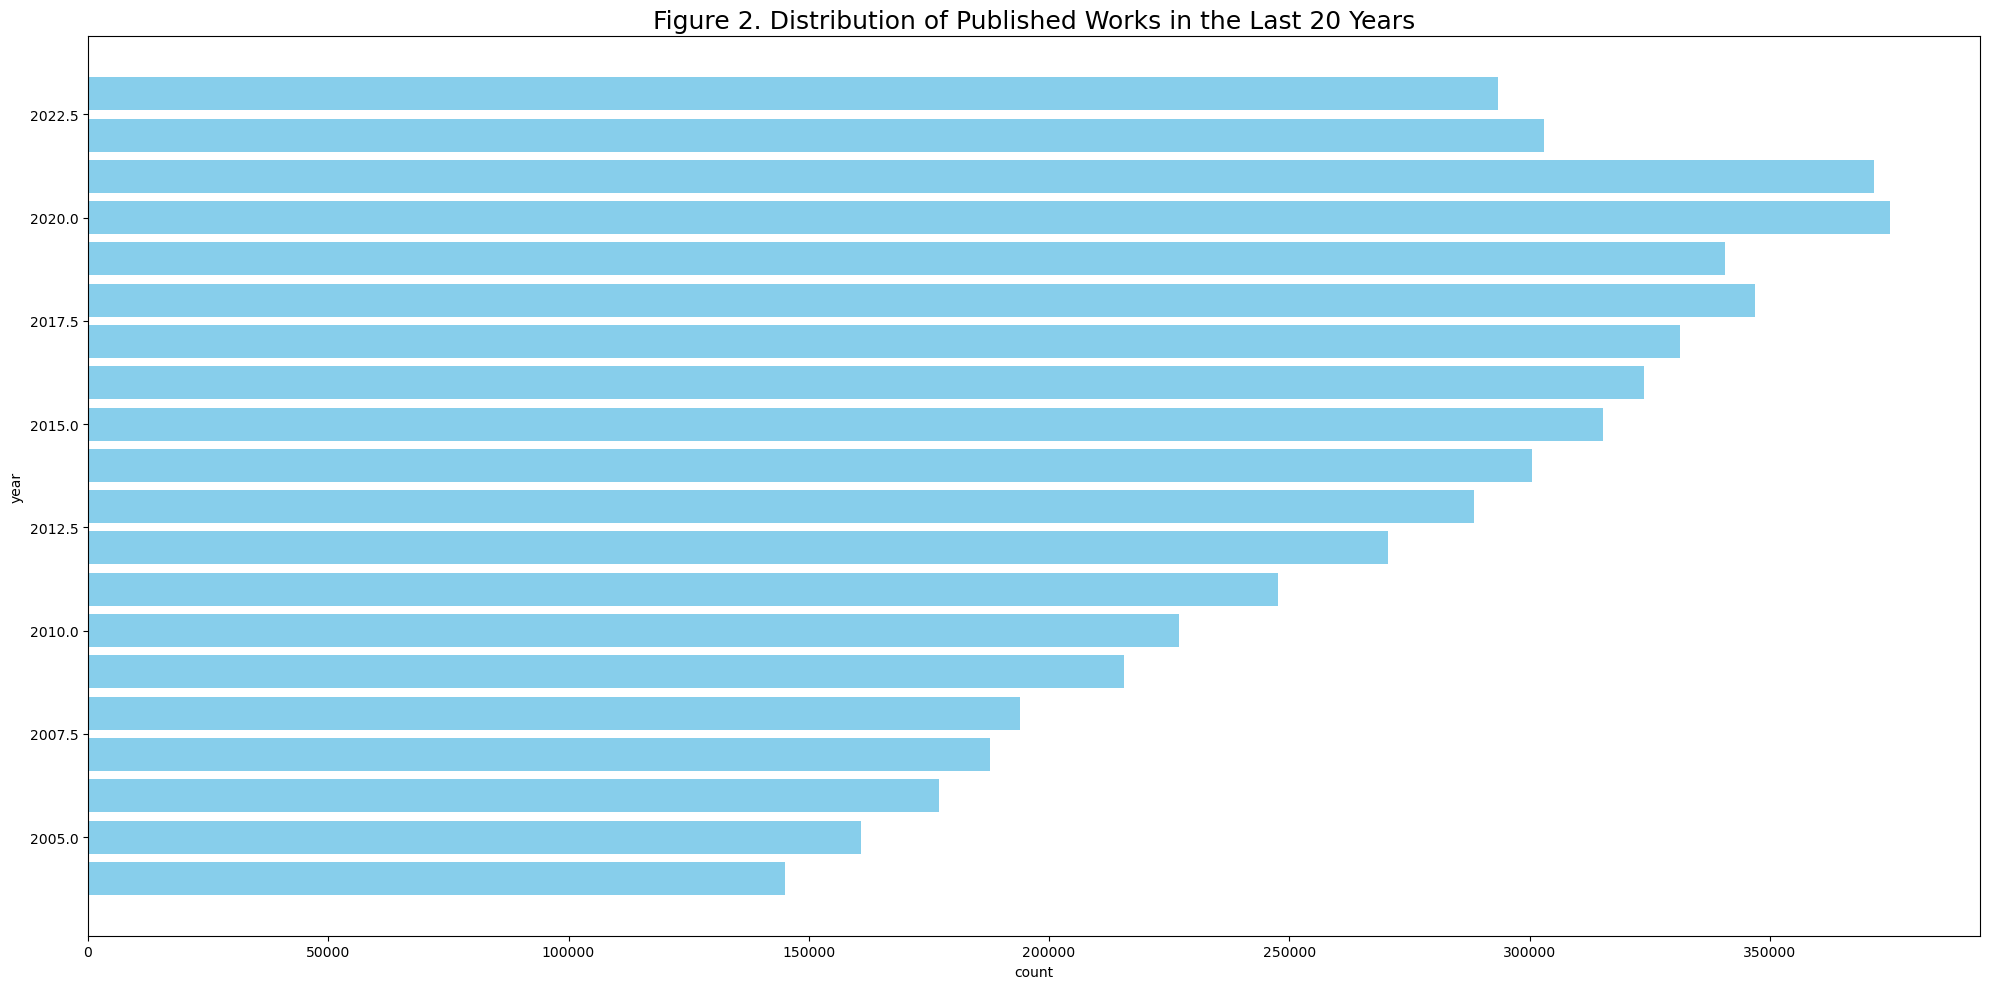

In [8]:
get_plot(df_year, 'year', 'count', 'Figure 2. Distribution of Published Works in the Last 20 Years',
         0, list(set(df_year.iloc[:, 0])));

As shown in Figure 2, the distribution of the published works has shown drastic changes over given the timeframe. It is evident that from year 2005, the trend is increasing, indicating that the volume of publication is indeed growing over the years. In addition, the number peaks at the year 2020, which could suggest the global increase in research endeavors, potentially about the recent pandemic. The relatively lower number of publication in the earlier years may suggest that efforts in digitalization is in the early stage.

#### By Institution:

After looking the publication trend over the years, we will now look into the publication patterns by institution.

In [9]:
df_inst = (df_oa.withColumn('exp_inst', F.explode(F.col('inst_id')))
           .groupby('exp_inst').count().orderBy(F.desc('count'))
           .limit(20).toPandas())

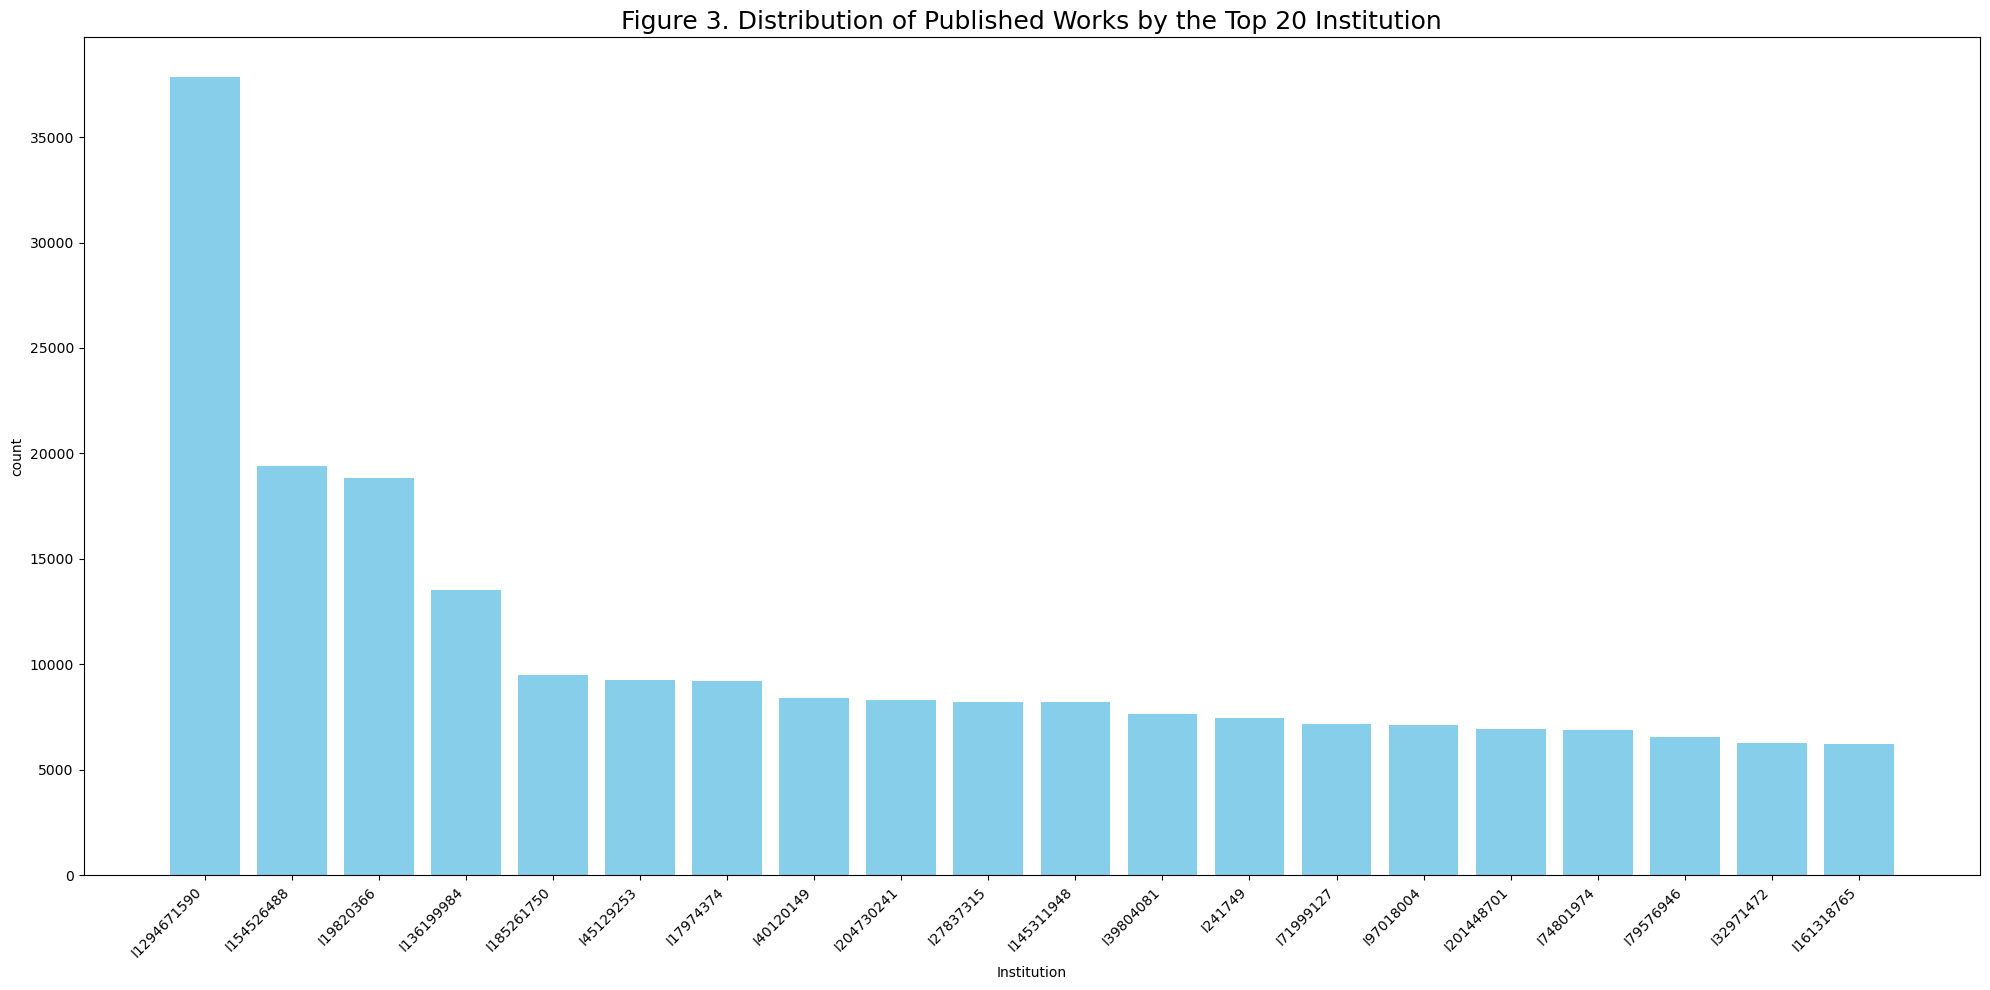

In [10]:
get_plot(df_inst, 'Institution', 'count',
         'Figure 3. Distribution of Published Works by the Top 20 Institution',
         45);

Figure 3 reveals that several institutions standout when it comes to number of published works, particularly `I12949671590`. This could suggest its reputation in making quality research outputs which consequently be able to garner more funds and grants. Also, this could also mean that the top institutions have large network resulting to higher collaborations which leads to higher publication count. In addition, the rest of the top institution have similar number of publications but they still significantly lag behind. These kind of institutions could have specializations affecting their volume of publications.

#### By Author:

Following the Institution publication trend, we shift our focus on the distribution of scholarly works by author.

In [11]:
df_auth= (df_oa.selectExpr("posexplode(author_id) as (pos, id)",
                           "author_pos[pos] as auth_pos")
          .filter(F.col('auth_pos') == 'first')
          .groupby('id').count().orderBy(F.desc('count'))
          .limit(20).toPandas())

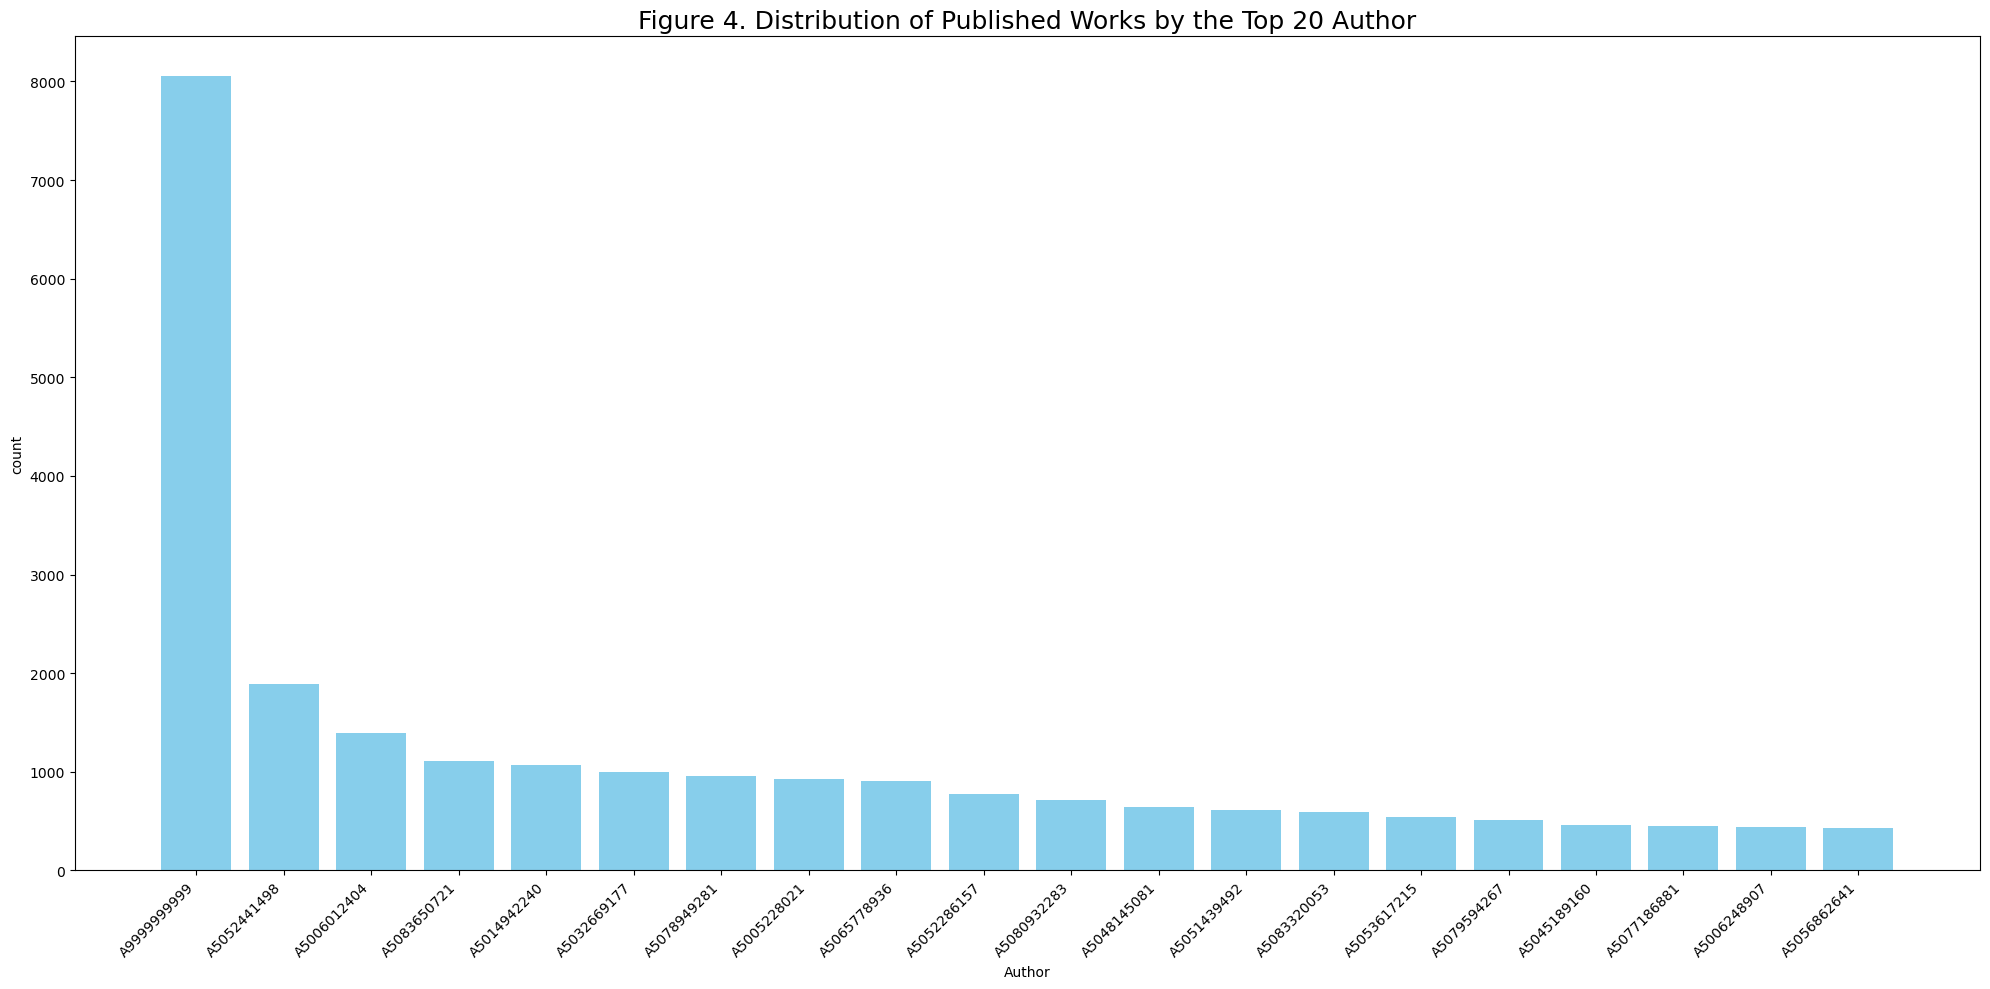

In [12]:
get_plot(df_auth, 'Author', 'count',
         'Figure 4. Distribution of Published Works by the Top 20 Author', 45)

Figure 4 shows a very skewed distribution of publication count per author similar to that of the previous figure. The most dominant author, `A9999999999`, has an outstanding nearly 8000 publications. This is possibly due to the longer duration of his/her tenure or more collaborations with other scholars due to his/her reputable standing. Other authors with relatively fewer publications could be caused by a variety of factors such as level of experience, research focus, or available resources.

#### By Type:

Having examined the authorship patterns on the OpenAlex dataset, we move on to the distribution of publications across different publication types.

In [13]:
df_type = (df_oa.select(F.col('type').alias('type')).groupby('type')
           .count().orderBy(F.desc('count')).toPandas())

In [14]:
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {df_type.iloc[:8].to_html()}
    </div>
    <div style="display: inline-block; text-align: left; margin-left: 20px; vertical-align: top;">
        {df_type.iloc[8:].to_html()}
    </div>
</div>
<b><center> Table 3. Count of Publications per Type<b>
'''

display(HTML(centered_html))


Table 3 shows the breakdown of counts by publication type. Articles are the most common type of publications, having a total of 8,407,544, which is significantly more compared to the other tyoes. This could suggest that articles are the primary method of showcasing research findings. There are 13 more types of publication, indicating diversity of mediums in which researchers dessiminate their work.

#### By Domain:

After exploring the publication works per type, we now investigate the distribution of works across different scientific domain.

In [15]:
df_domain = (df_oa.select(F.col('domain').alias('domain'))
             .filter(F.col('domain').isNotNull()).groupby('domain')
           .count().orderBy(F.desc('count')).toPandas())

In [16]:
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {df_domain.to_html()}
    </div>
</div>
<b><center> Table 4. Count of Publications by Domain<b>
'''

display(HTML(centered_html))

Table 4 shows the distribution of publications across domains. We can see that Health Sciences and Physical emerges as the top domain. This could suggest the research and development on this field is essential. Also a possible explanation of why the works done Health and Physical Science is similar or at the same level is because the advancement of technology affects the advancement of other fields, specifically the Health Sciences.

To gain more understanding on the `domain` category, a more granular exploration were conducted and the results are shown on Figure 5.

In [17]:
df_field = (df_oa.select(F.col('domain').alias('domain'),
                      F.col('field').alias('field'))
            .filter((F.col('domain').isNotNull()) 
                    & (F.col('field').isNotNull())).groupby('domain', 'field')
           .count().orderBy(F.desc('count')).toPandas())

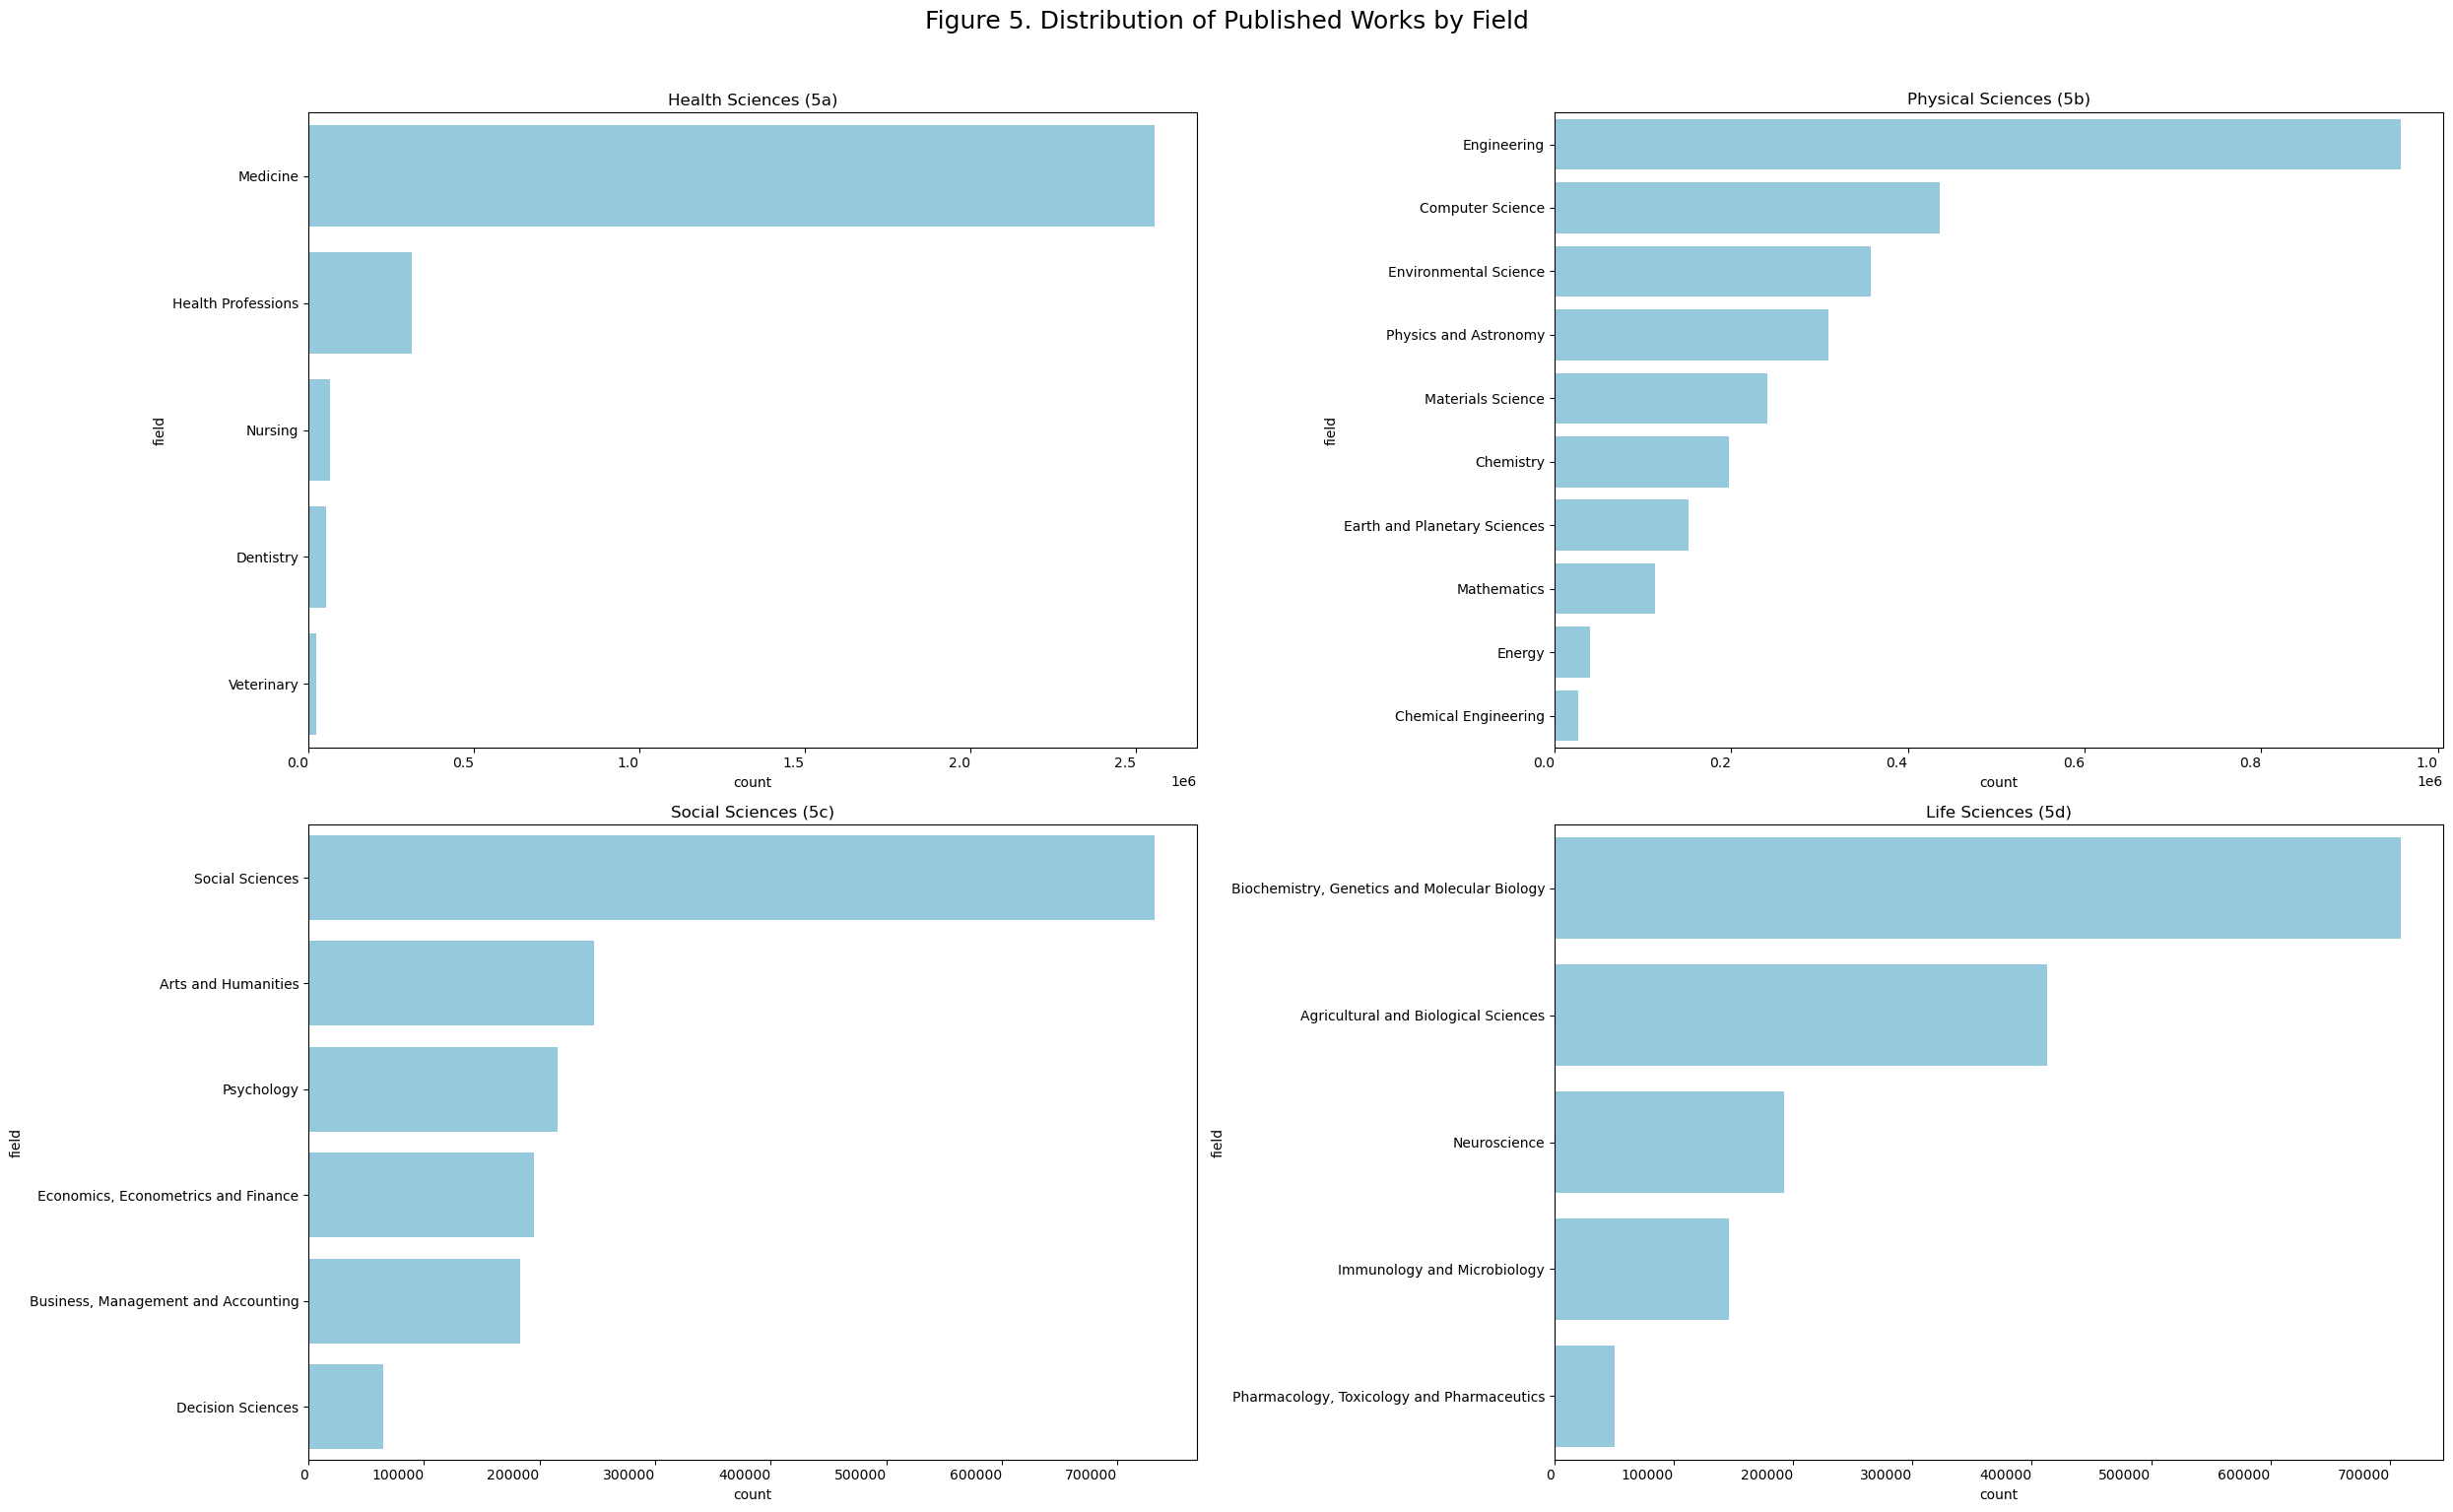

In [18]:
domains = df_field['domain'].unique()

n_domains = len(domains)
n_cols = 2 
n_rows = 2 

plt.figure(figsize=(25,15)) 

for i, domain in enumerate(domains, 1):
    plt.subplot(n_rows, n_cols, i)
    df_subset = df_field[df_field['domain'] == domain]
    sns.barplot(data=df_subset, y='field', x='count', color='skyblue',
                orient='h')
    plt.title(f'{domain} (5{chr(96 + i)})')
    plt.xticks(rotation=0, ha='right') 

plt.suptitle('Figure 5. Distribution of Published Works by Field',
             fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

Figure 5 showcases the subcategories of each domain and their respective publication counts. Unsurprisingly, Medicine is the top field in terms of publications. This reflects the global effort in attempting to provide or improve health services by finding cure or aid for diseases and sickness, consiquently prolonging humanity's lifespan. On the other hand, it is surprising to note that Chemical Engineering scholarly works is separated from the Engineering works. This could suggest that in comparison to other engineering disciplines, chemical engineering publication rate is higher. 

### Keywords on Recent Publications

Next, we shift our focus on the contents of the publications. By getting the keywords in the publication titles, we can identify the prominent themes. We created word clouds to visualize the most frequently used keywords for specific years: 2021 (Figure 6), 2020 (Figure 7), and 2000 (Figure 8). The year 2021 and 2020 had the most number of published works based on the results on Figure 2. Finally, the year 2000 provides us a historical reference point that will allow us to compare the shift of themes over the decades.

In [19]:
languages = ['english']
stopwords = set(sum([stopwords.words(lang) for lang in languages], []))

df_title = (df_oa.select(F.lower(F.col('title')).alias('title'),
                         F.col('publication_year'))
            .filter(((F.col('publication_year') == 2021) 
                    | (F.col('publication_year') == 2020)
                    | (F.col('publication_year') == 2000))))
df_title = (df_title.withColumn('word', 
                                F.explode(F.split(F.col("title"), "\\s+")))
            .filter(is_not_stopword(F.col("word"))))
word_counts = (df_title.groupBy("publication_year", "word").count()
               .orderBy("count", ascending=False))

#### For the year 2021

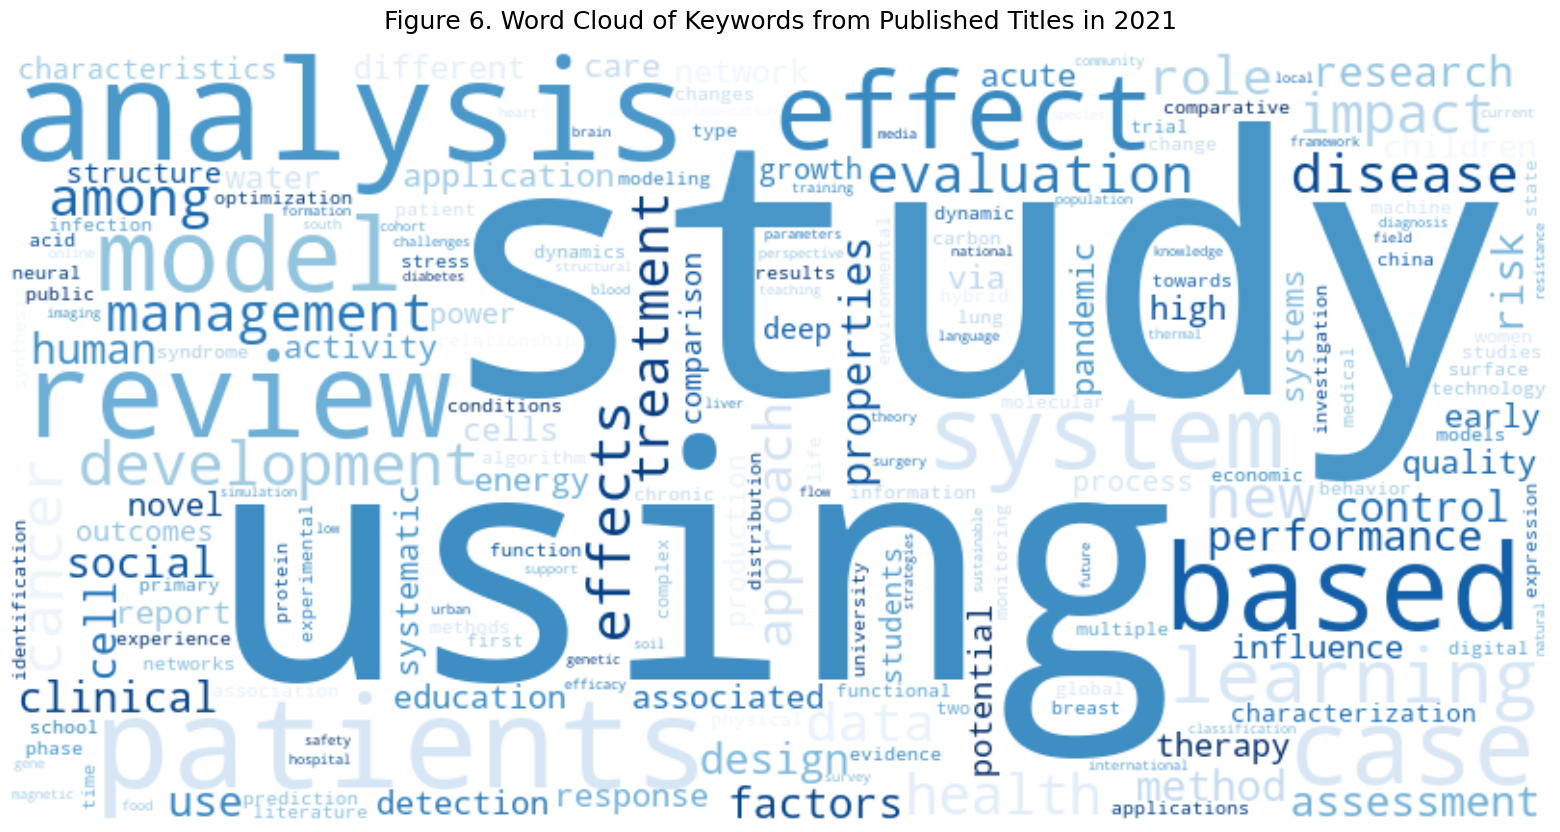

In [20]:
get_wordcloud(word_counts, 2021, 
              'Figure 6. Word Cloud of Keywords from Published Titles in 2021')

#### For the year 2020

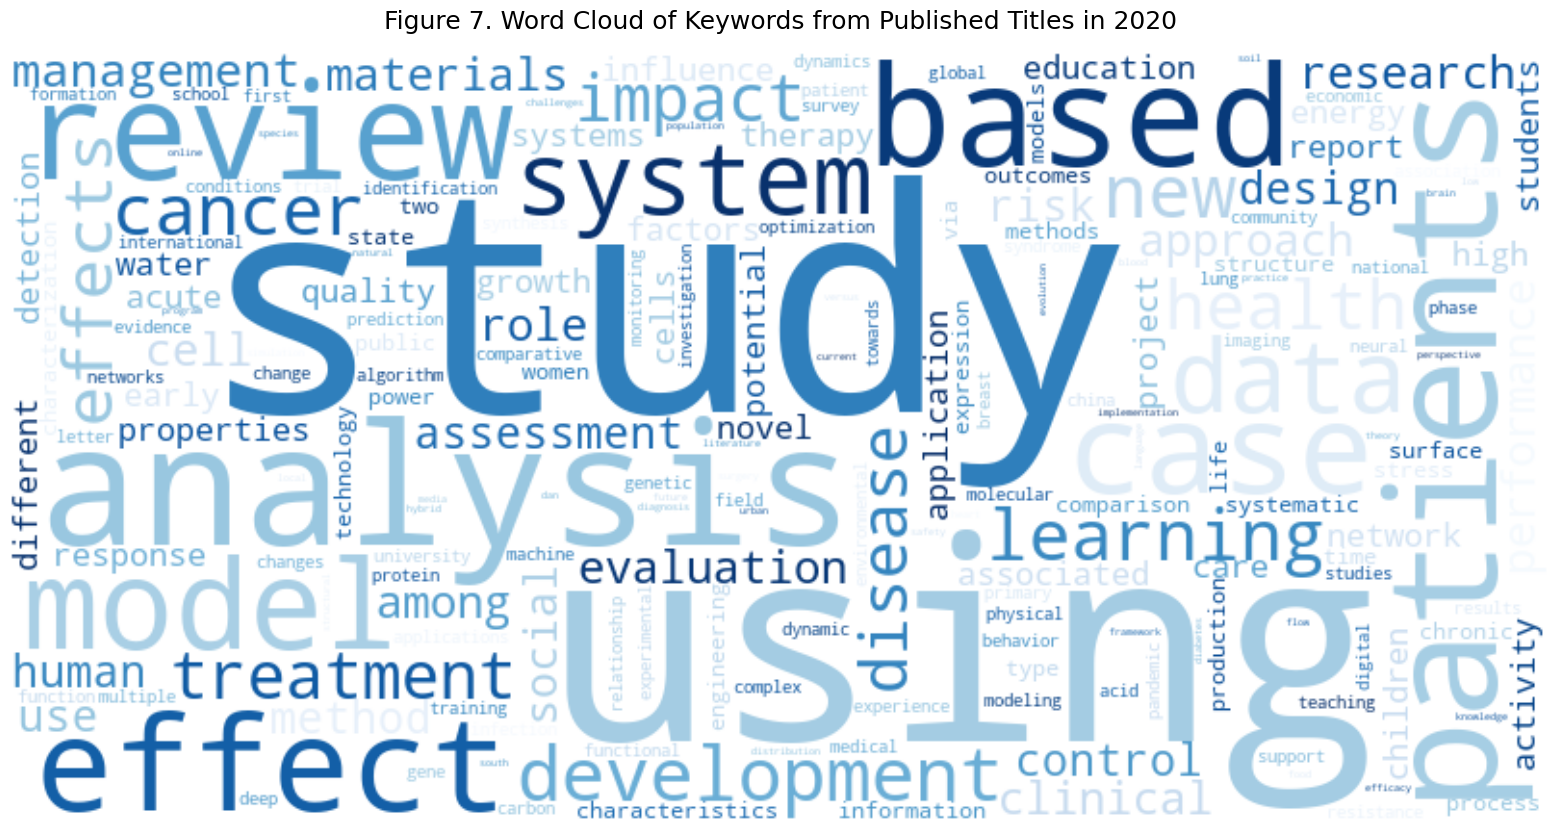

In [21]:
get_wordcloud(word_counts, 2020,
              'Figure 7. Word Cloud of Keywords from Published Titles in 2020')

#### For the year 2000

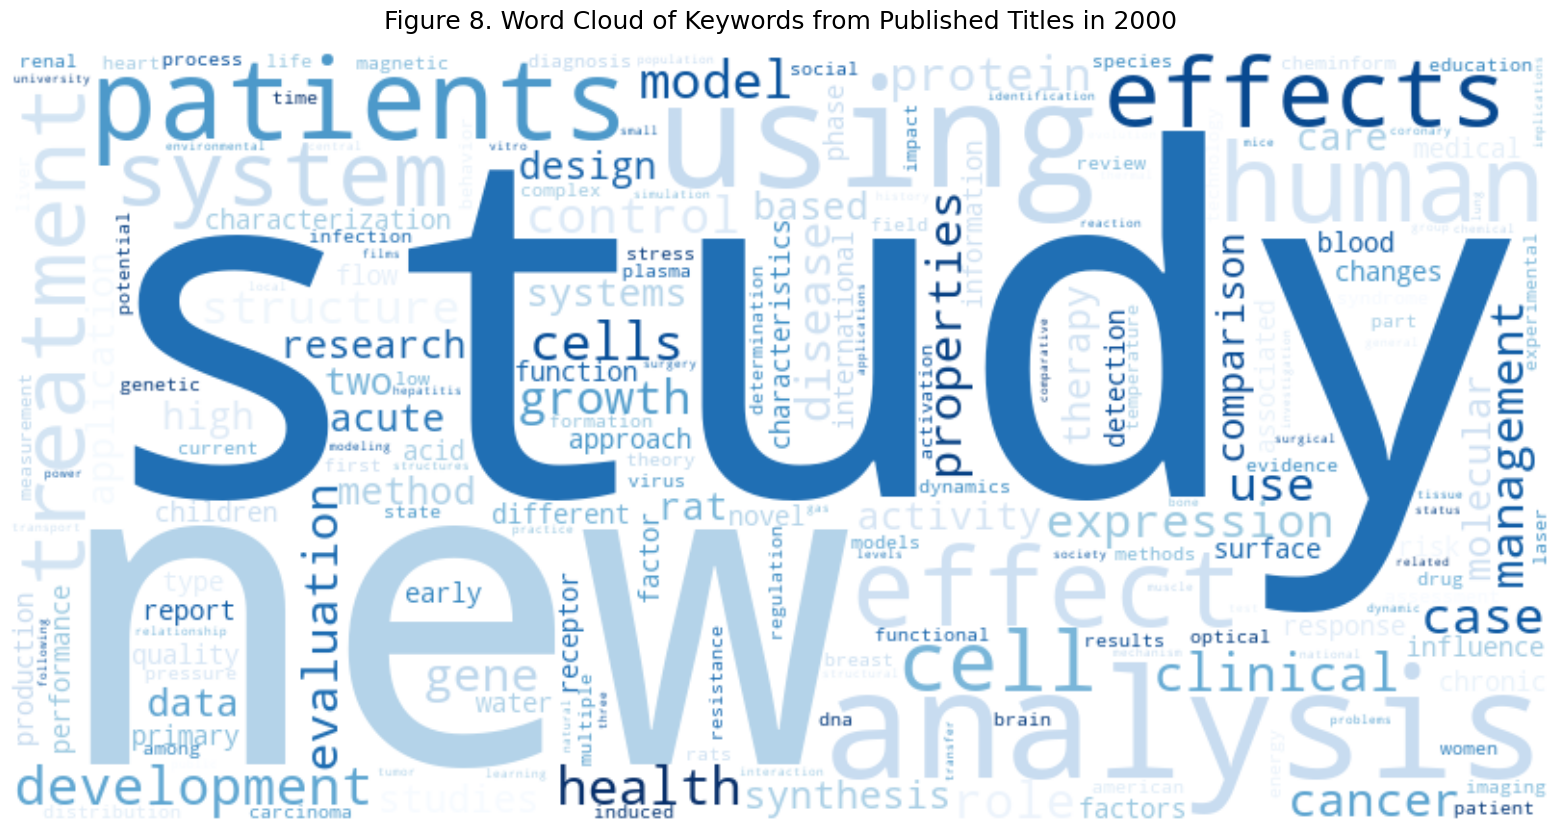

In [22]:
get_wordcloud(word_counts, 2000,
              'Figure 8. Word Cloud of Keywords from Published Titles in 2000')

Based on the word clouds generated for 2021, 2020, and 2000 (Figures 6, 7, and 8), terms like "study," "using," and "analysis" appear the most often across all three years. This suggests a consistent focus on methodologies, potentially indicating a widespread of research involving testing different methods and analyzing results. 

To delve deeper into this observation, let's examine the distribution of works with the term **"study"** within their titles across different fields (Figure 9). This will reveal which fields are using this type of research approach.

In [23]:
df_study = (df_oa.select(F.col('title'), F.col('field'))
 .filter((F.lower(F.col('title')).contains('study'))
        & (F.col('field').isNotNull())
        & ((F.col('publication_year') == 2021)
           | (F.col('publication_year') == 2020)
           | (F.col('publication_year') == 2000)))
 .groupby(F.col('field')).count().orderBy(F.desc('count')).toPandas())

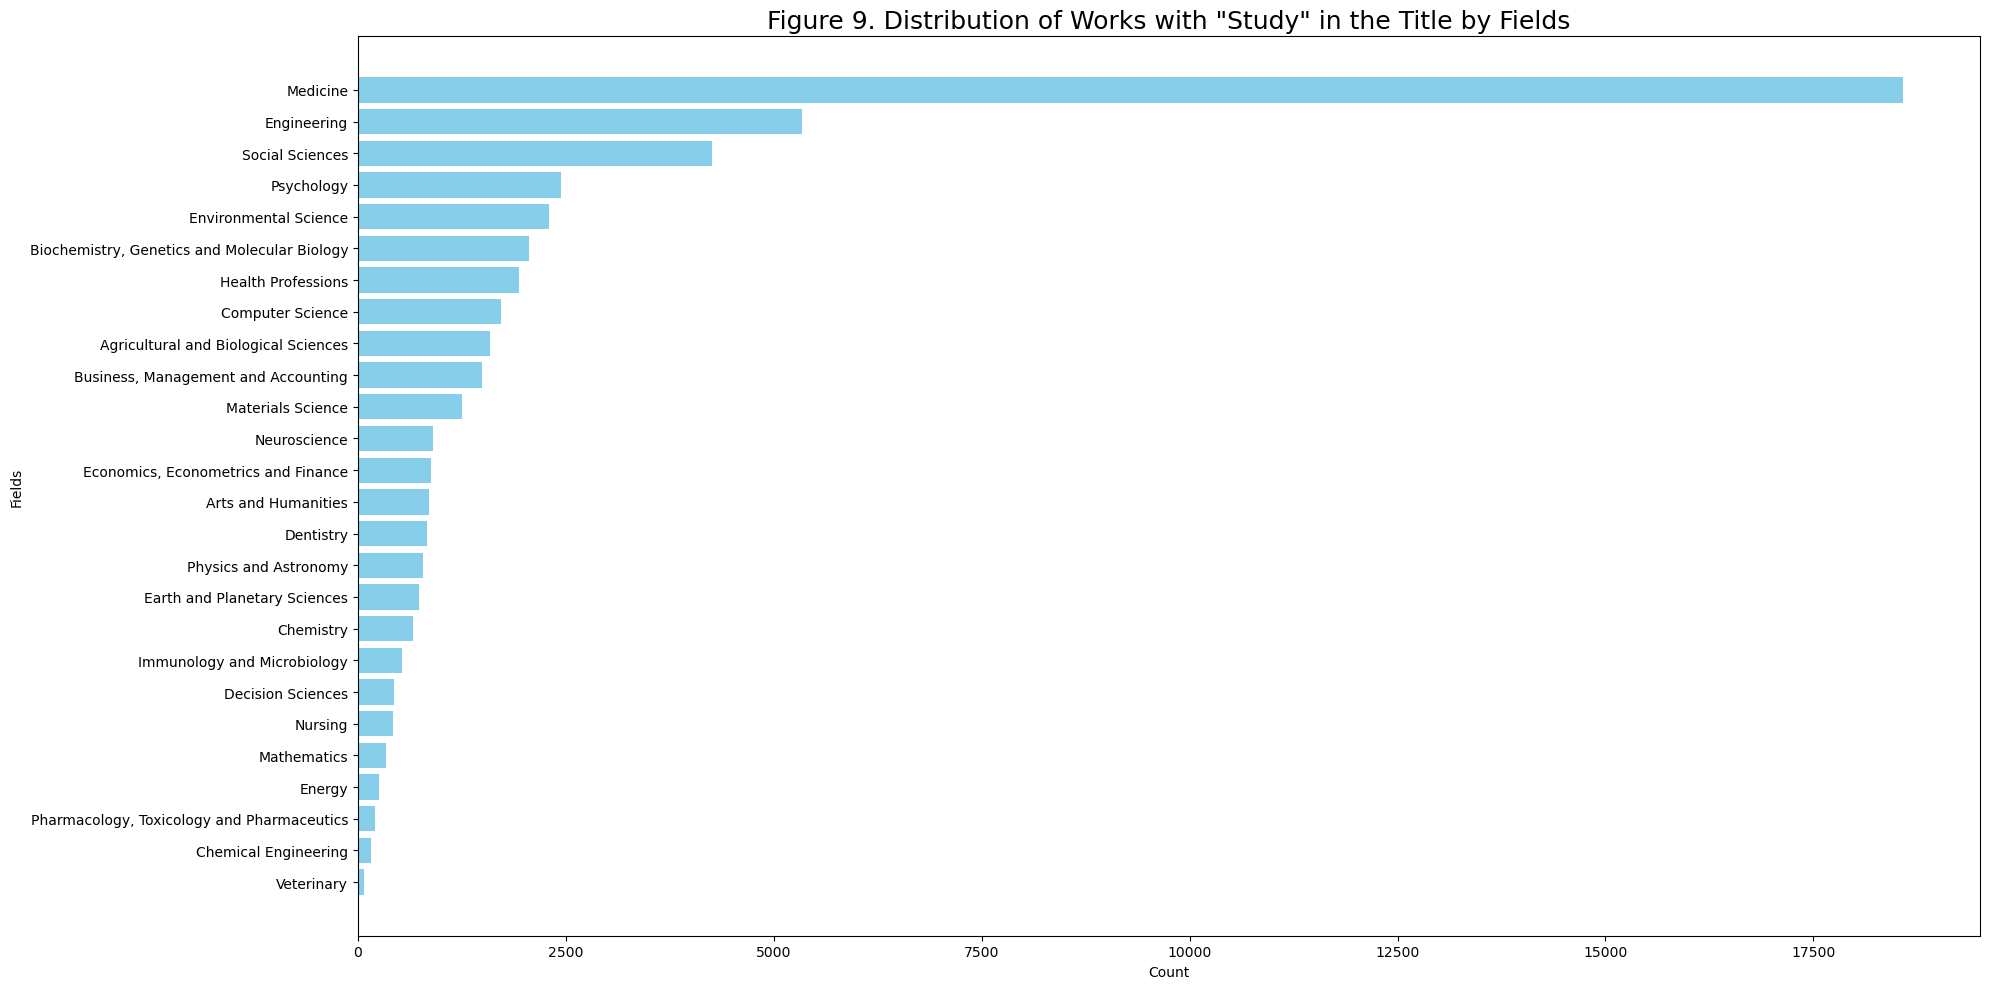

In [24]:
get_plot(df_study.sort_values('count', ascending=True), 'Fields', 'Count',
         'Figure 9. Distribution of Works with "Study" in the Title by Fields',
         45, horizontal=True)

The field of medicine appears to have the highest number of published works containing "study" in their titles as shown in Figure 9. This is consistent with the trends of publication counts by field (Figure 5), reflecting their active research environment. The distribution could also suggest that certain fields are prioritized and given more funding to produce these studies.

### Quality of Publication Works

To analyze the quality of works, we used the provided scores from the OpenAlex data. These scores are produced by multilingual BERT model and neural networks using AWS Sagemaker, a machine learning platfrom from Amazon Web Services (OpenAlex Topic Classification Whitepaper, n.d.). 

#### By Score:

In [25]:
oa_mean = df_oa.select(F.mean('primary_score')).collect()[0][0]
print(f'The mean score for all published works is {oa_mean}')

The mean score for all published works is 0.9007454049623144


From the mean scores, we will analyze the distribution of below and above average scores.

In [26]:
df_cat = (df_oa.select(
    F.sum(F.when(F.col('primary_score') <= oa_mean, 1)
          .otherwise(0)).alias('below_avg_count'),
    F.sum(F.when(F.col('primary_score') > oa_mean, 1)
          .otherwise(0)).alias('above_avg_count'))
          .selectExpr(
    "stack(2, 'below_avg', below_avg_count, 'above_avg',above_avg_count) \
     as (Category, Count)").toPandas())

In [27]:
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {df_cat.to_html()}
    </div>
</div>
<b><center> Table 5. Count of Below and Above Average Score<b>
'''

display(HTML(centered_html))

Out of 8,991,534 published works, 77.4% have scores above the mean, while 22.6% are at or below average as illustrated in Table 5.

Previously, we observed that the field of medicine has the most published work. Now, we will investigate whether these works also translate to higher quality based on the scores by getting the percentage of above average scores per field.

In [28]:
df_field_quality = (df_oa.select(F.col('field'), F.col('primary_score'))
                    .withColumn('check_score',
                                F.when(F.col('primary_score') > oa_mean, 1)
                                .otherwise(0))
                    .filter(F.col('field').isNotNull())
                    .groupby('field').agg(F.sum('check_score')
                                          .alias('#_above_avg'))
                    .orderBy(F.desc('#_above_avg')).toPandas())

In [29]:
df_field_quality = (pd.merge(df_field_quality,
                             df_field[['field', 'count']],
                             how='inner', on='field'))
df_field_quality['prop'] = (df_field_quality['#_above_avg'] 
                            / df_field_quality['count'])
df_field_quality = df_field_quality.sort_values('prop', ascending=True)

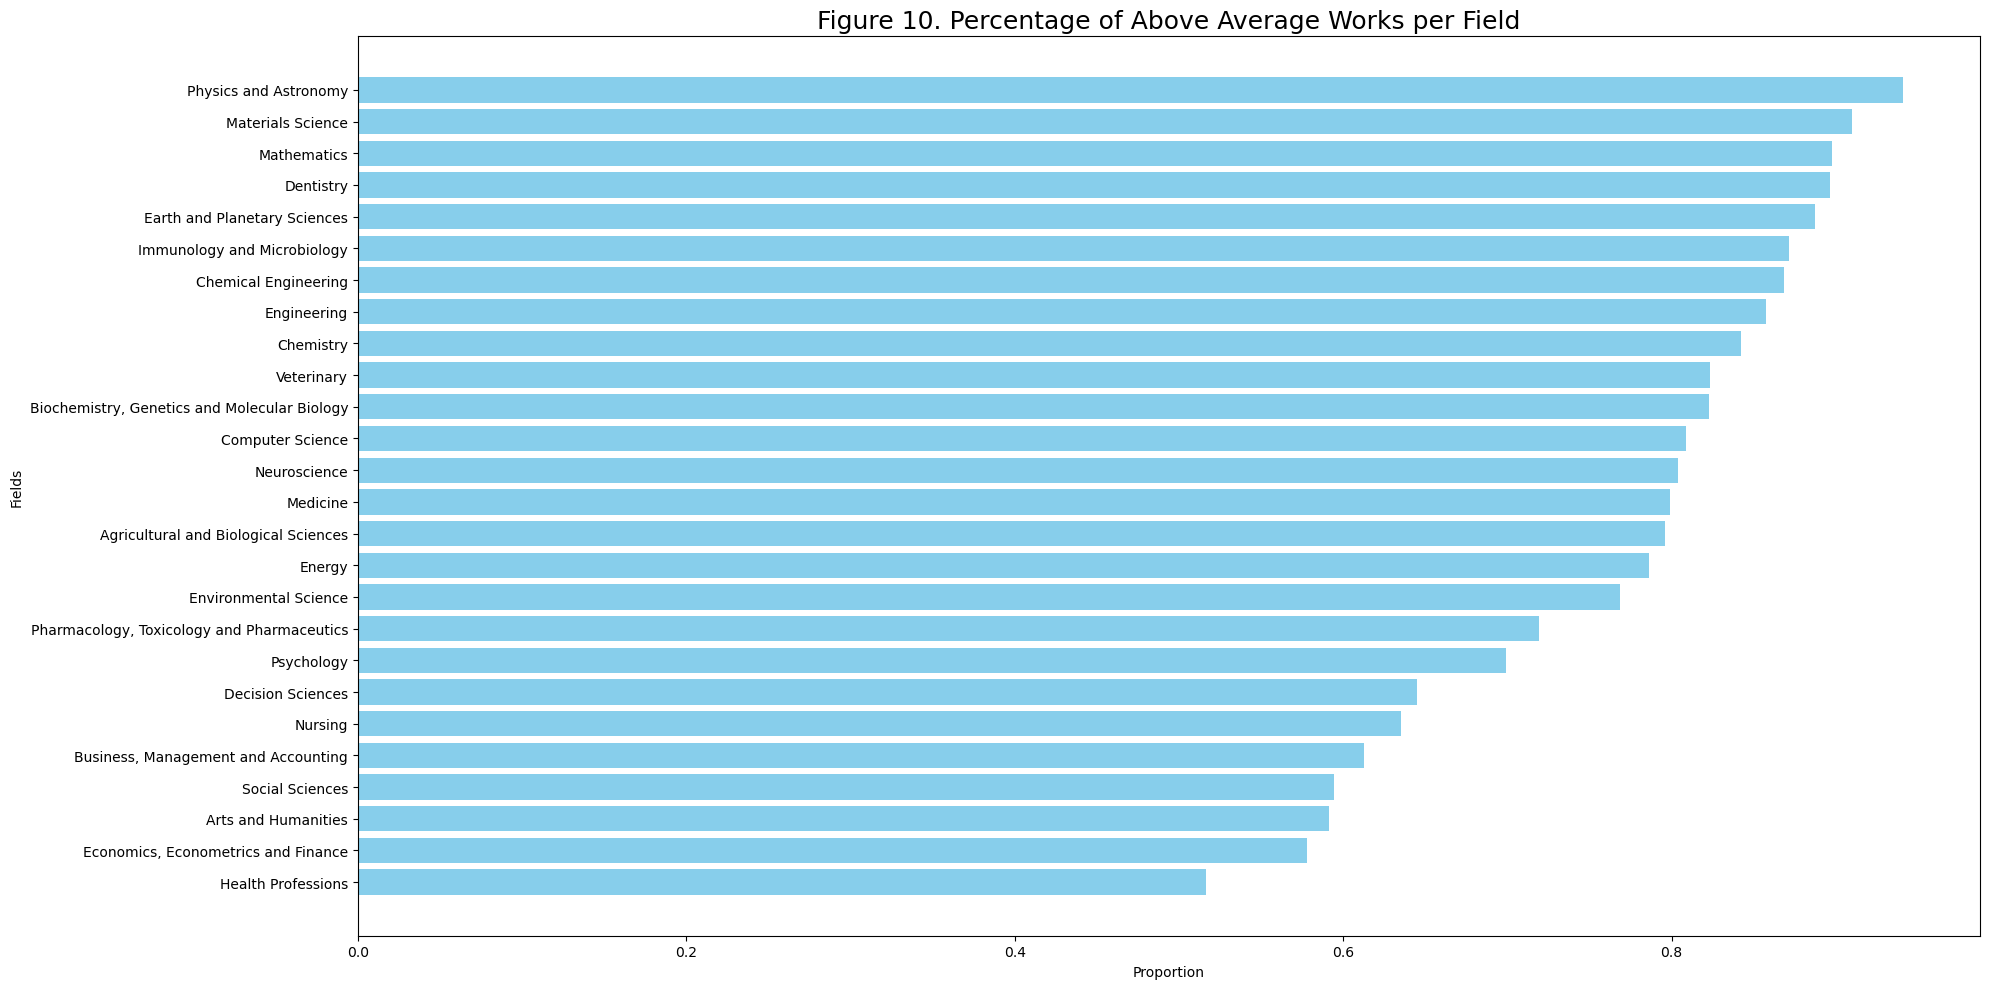

In [30]:
get_plot(df_field_quality.iloc[:, [0, 3]], 'Fields', 'Proportion',
         'Figure 10. Percentage of Above Average Works per Field', 45,
         horizontal=True)

It seems that although Medicine had the most published works, only around 79.83% of them are above average, while Physics and Astronomy had the highest proportion of quality works.

Next, we will look into the average scores across the years.

In [31]:
df_pub_score = (df_oa.select(F.col('publication_year'),
                             F.col('primary_score'))
                .filter((F.col('publication_year') <= '2024')
                        & (F.col('publication_year') >= '1980'))
                .groupby('publication_year')
                .agg(F.mean('primary_score').alias('avg_score'))
                .orderBy(F.desc('publication_year'))
                .toPandas())

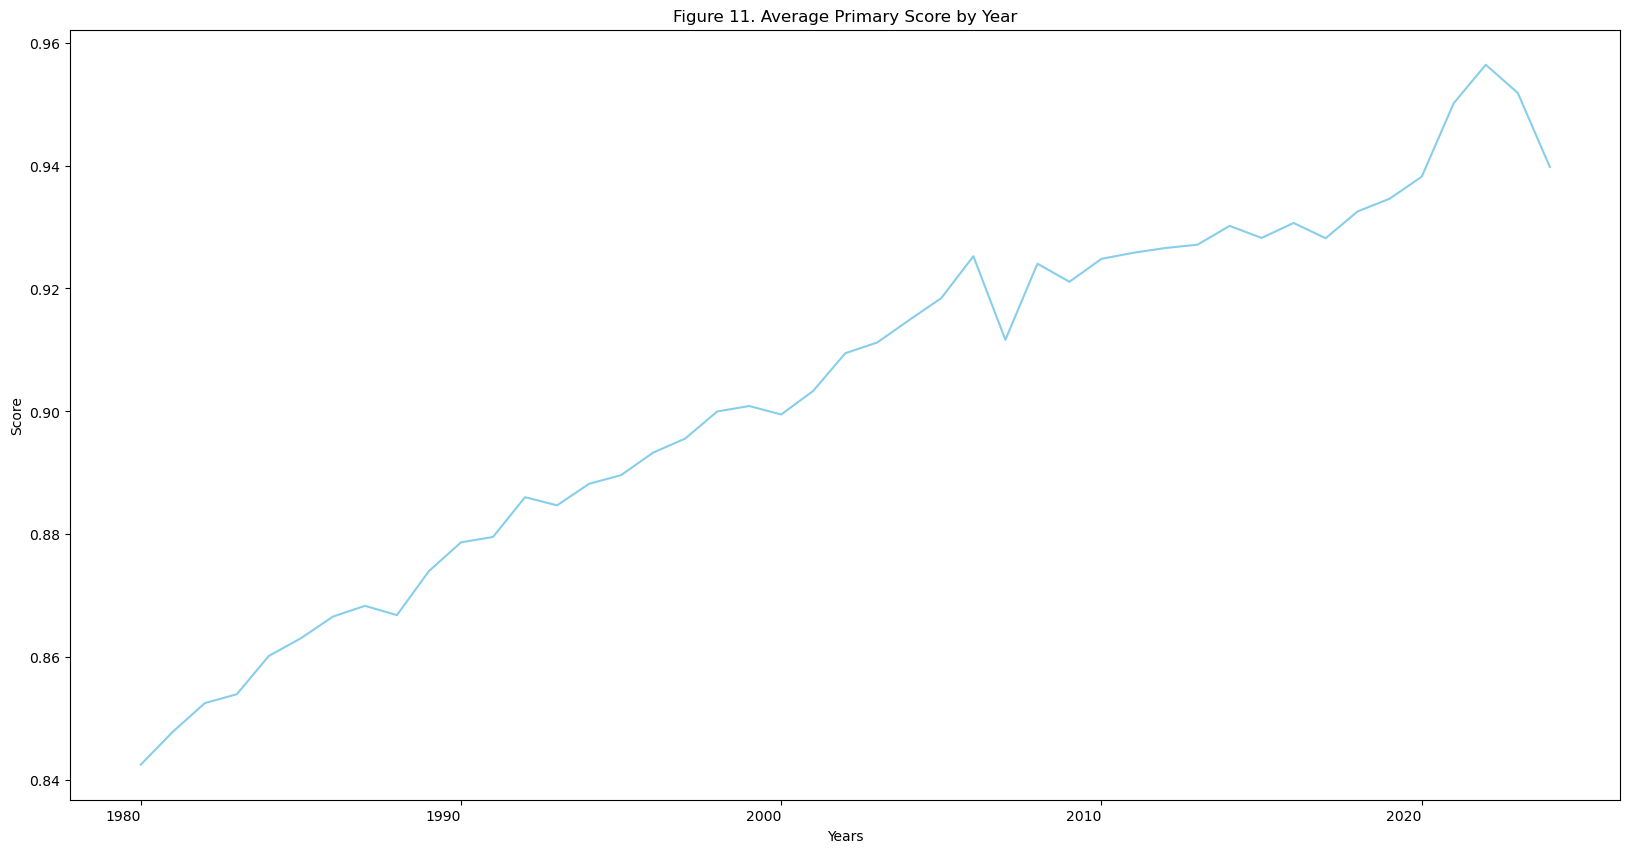

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(df_pub_score.iloc[:, 0], df_pub_score.iloc[:,1], color='skyblue')
plt.xlabel('Years')
plt.ylabel('Score')
plt.title('Figure 11. Average Primary Score by Year')
plt.xticks(rotation=0, ha='right') 
plt.xticks
plt.show()

As illustrated in Figure 11, the average score appears to fluctuate but is relatively stable on the upward direction, suggesting general improvements overtime. Notably, we can observe that the scores dipped nearing 2010 and around 2022, which could indicate challenges in research or changes in terms of academic standards.

#### By Citations:

The OpenAlex scoring system might not fully capture the intricacies and the other factors that could affect the scholarly quality. Due to that, we will now investigate the citation impact.

In [33]:
df_auth_cit = (df_oa.selectExpr("posexplode(author_id) as (pos, id)",
                                "author_pos[pos] as auth_pos",
                                'cited_by_count')
               .filter(F.col('auth_pos') == 'first')
               .groupby('id').agg(F.sum('cited_by_count')
                                  .alias('total_citation'))
               .orderBy(F.desc('total_citation')).limit(20).toPandas())

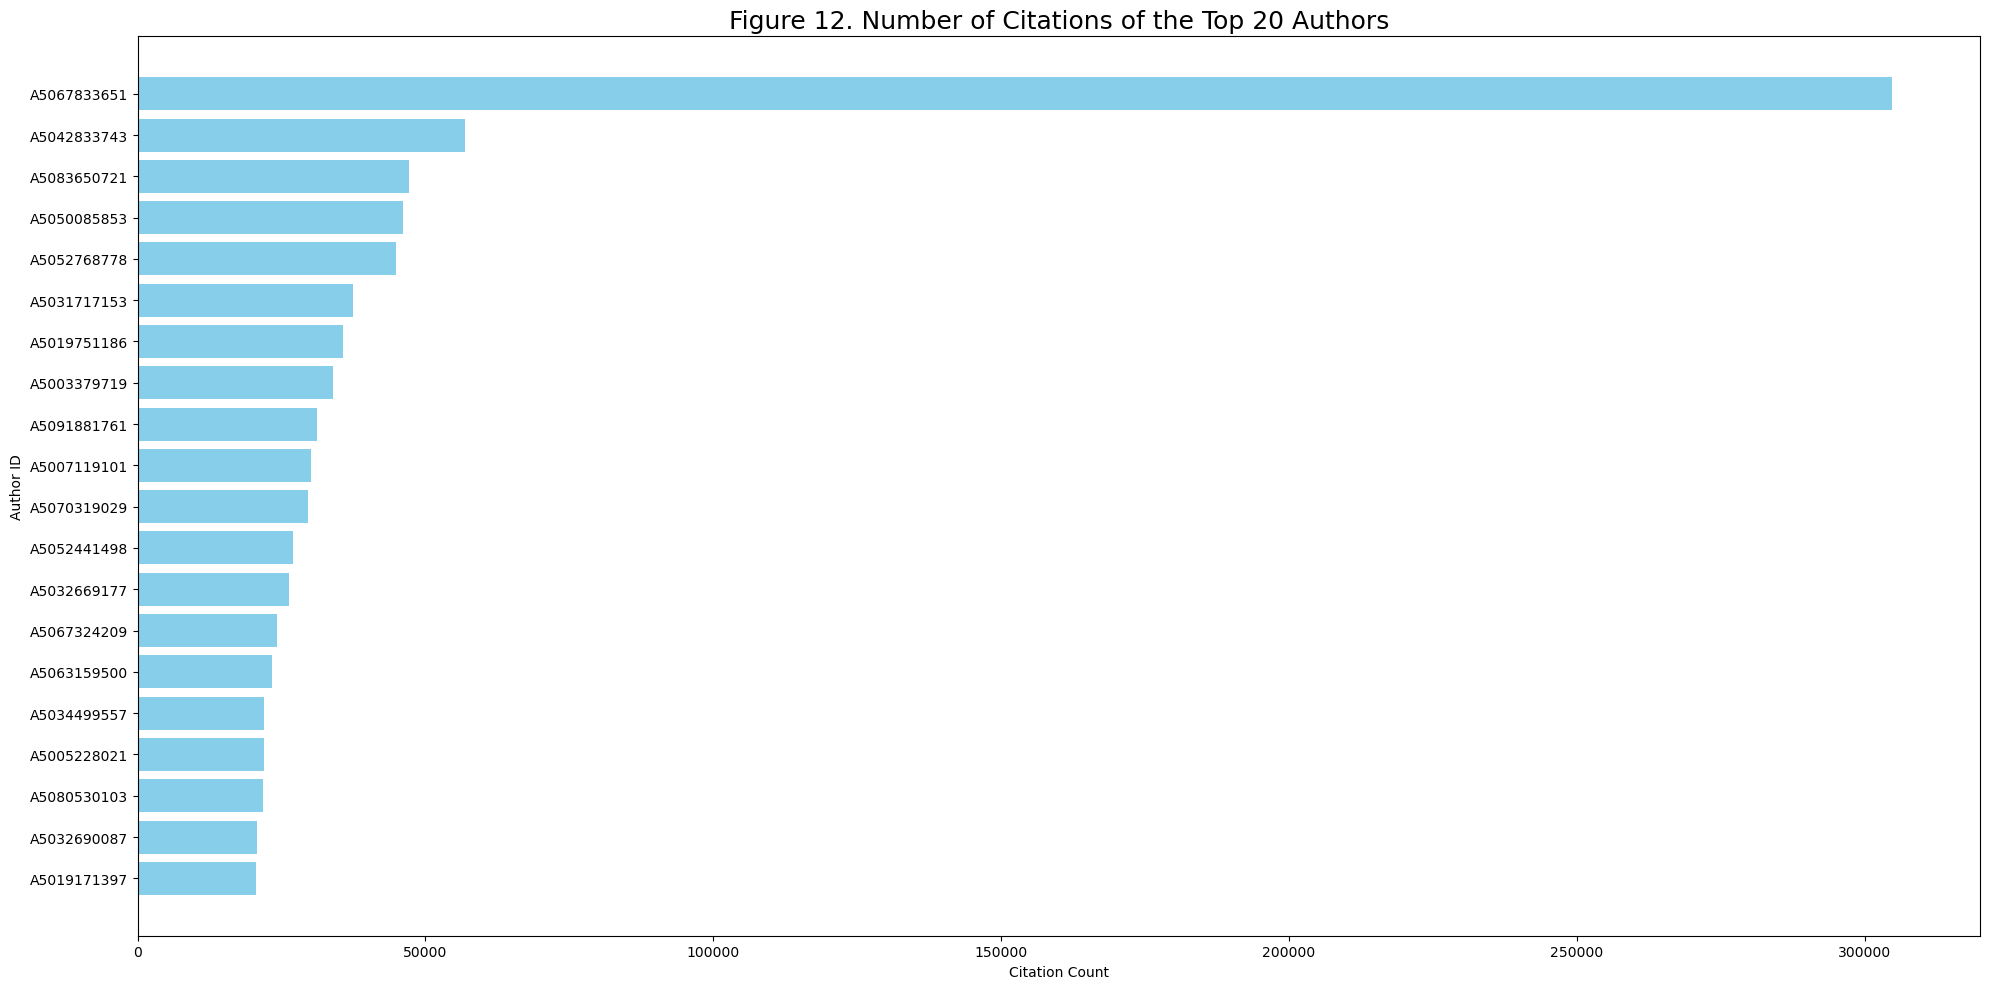

In [34]:
get_plot(df_auth_cit.sort_values('total_citation', ascending=True),
         'Author ID', 'Citation Count',
         'Figure 12. Number of Citations of the Top 20 Authors',
         45, horizontal=True)

We can observe in Figure 12 the distribution of citation counts by authors. Notably, author `A5067833651` accumulated the most citation count, suggesting their work have high impact and frequently referenced. The remaining authors have relatively similary amount of citations for their work.

We can explore deeper by looking into the respective domains and fields of these authors, as well as the average score of their works.

In [35]:
id_list = list(df_auth_cit.iloc[:5, 0])

In [36]:
df_ap = (df_oa.selectExpr("posexplode(author_id) as (pos, id)",
                  "author_pos[pos] as auth_pos",
                  'cited_by_count', 'field', 'domain', 'primary_score')
 .filter((F.col('auth_pos') == 'first')
         & (F.col('id').isin(id_list))
         & (F.col('field').isNotNull()))
 .groupby('id', 'field', 'domain').agg(F.sum('cited_by_count').alias('total_citation'),
                    F.mean('primary_score').alias('mean_score'))
 .orderBy('id').toPandas())

In [37]:
df_ap = df_ap.sort_values('total_citation', ascending=False)

In [38]:
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {df_ap.to_html()}
    </div>
</div>
<b><center> Table 6. Author's Published Work Profile<b>
'''

display(HTML(centered_html))

Table 6 showcases the Author's published work profile which inludes their respective field, domain, and the total citation and average score of their work. Notably, Life Sciences is the expertise of Author `A5067833651`. Unlike the previous trend where Medicine field dominated the publication count, we can observe here that for the top authors with the highest citation count, Medicine field was excluded in the list. This could suggest that Life Sciences and Social Sciences have less reputable figures in their field and potentially have less resources to inspire more competition. Generally, the mean scores are high with many authors obtained close to 1, reflecting the quality of their work.

Next, we can look into the quality of the works done by the published author.

In [39]:
df_apc = (df_oa.selectExpr("posexplode(author_id) as (pos, id)",
                  "author_pos[pos] as auth_pos",
                  'cited_by_count', 'primary_score')
 .filter((F.col('auth_pos') == 'first'))
 .groupby('id').agg(F.sum('cited_by_count').alias('total_citation'),
                    F.mean('primary_score').alias('mean_score'),
                    F.count('id').alias('publication_count'))
 .orderBy('publication_count').toPandas())

In [40]:
df_apc= df_apc.sort_values('publication_count', ascending=False)

In [41]:
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {df_apc.head(20).to_html()}
    </div>
</div>
<b><center> Table 7. Author's Profile by Publication Count<b>
'''

display(HTML(centered_html))

Table 7 shows the citation count and the average score of the top published authors. We can see that author `A9999999999` has the most publication count, but the quality in terms of both citations and mean score is less than most of the author in the group. It seems that higher publication count does not necessitates the ability of the author to output high impact research publications.

In [42]:
df_atc = df_apc.sort_values('total_citation', ascending=False)

In [43]:
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {df_atc.head(20).to_html()}
    </div>
</div>
<b><center> Table 8. Author's Profile by Total Citation Count<b>
'''

display(HTML(centered_html))

This time, the author profile is sorted according to the total number of citations, as shown in Table 8. The top author, `A5067833651`, received a high average score from OpenAlex (0.97), while the following  author, `A5042833743`, received the lowest in this list. It seems that the score OpenAlex gives does not reflect higher citation counts. But, generally, more citations have higher mean score.

Now, let's shift our focus on observing the quality of works per Domain.

In [44]:
df_dt = (df_oa.select('domain', 'publication_year', 'cited_by_count',
                      'primary_score')
         .filter(F.col('domain').isNotNull())
         .groupby('domain', 'publication_year')
         .agg(F.sum('cited_by_count').alias('total_citation'),
             F.mean('primary_score').alias('mean_score')).toPandas())

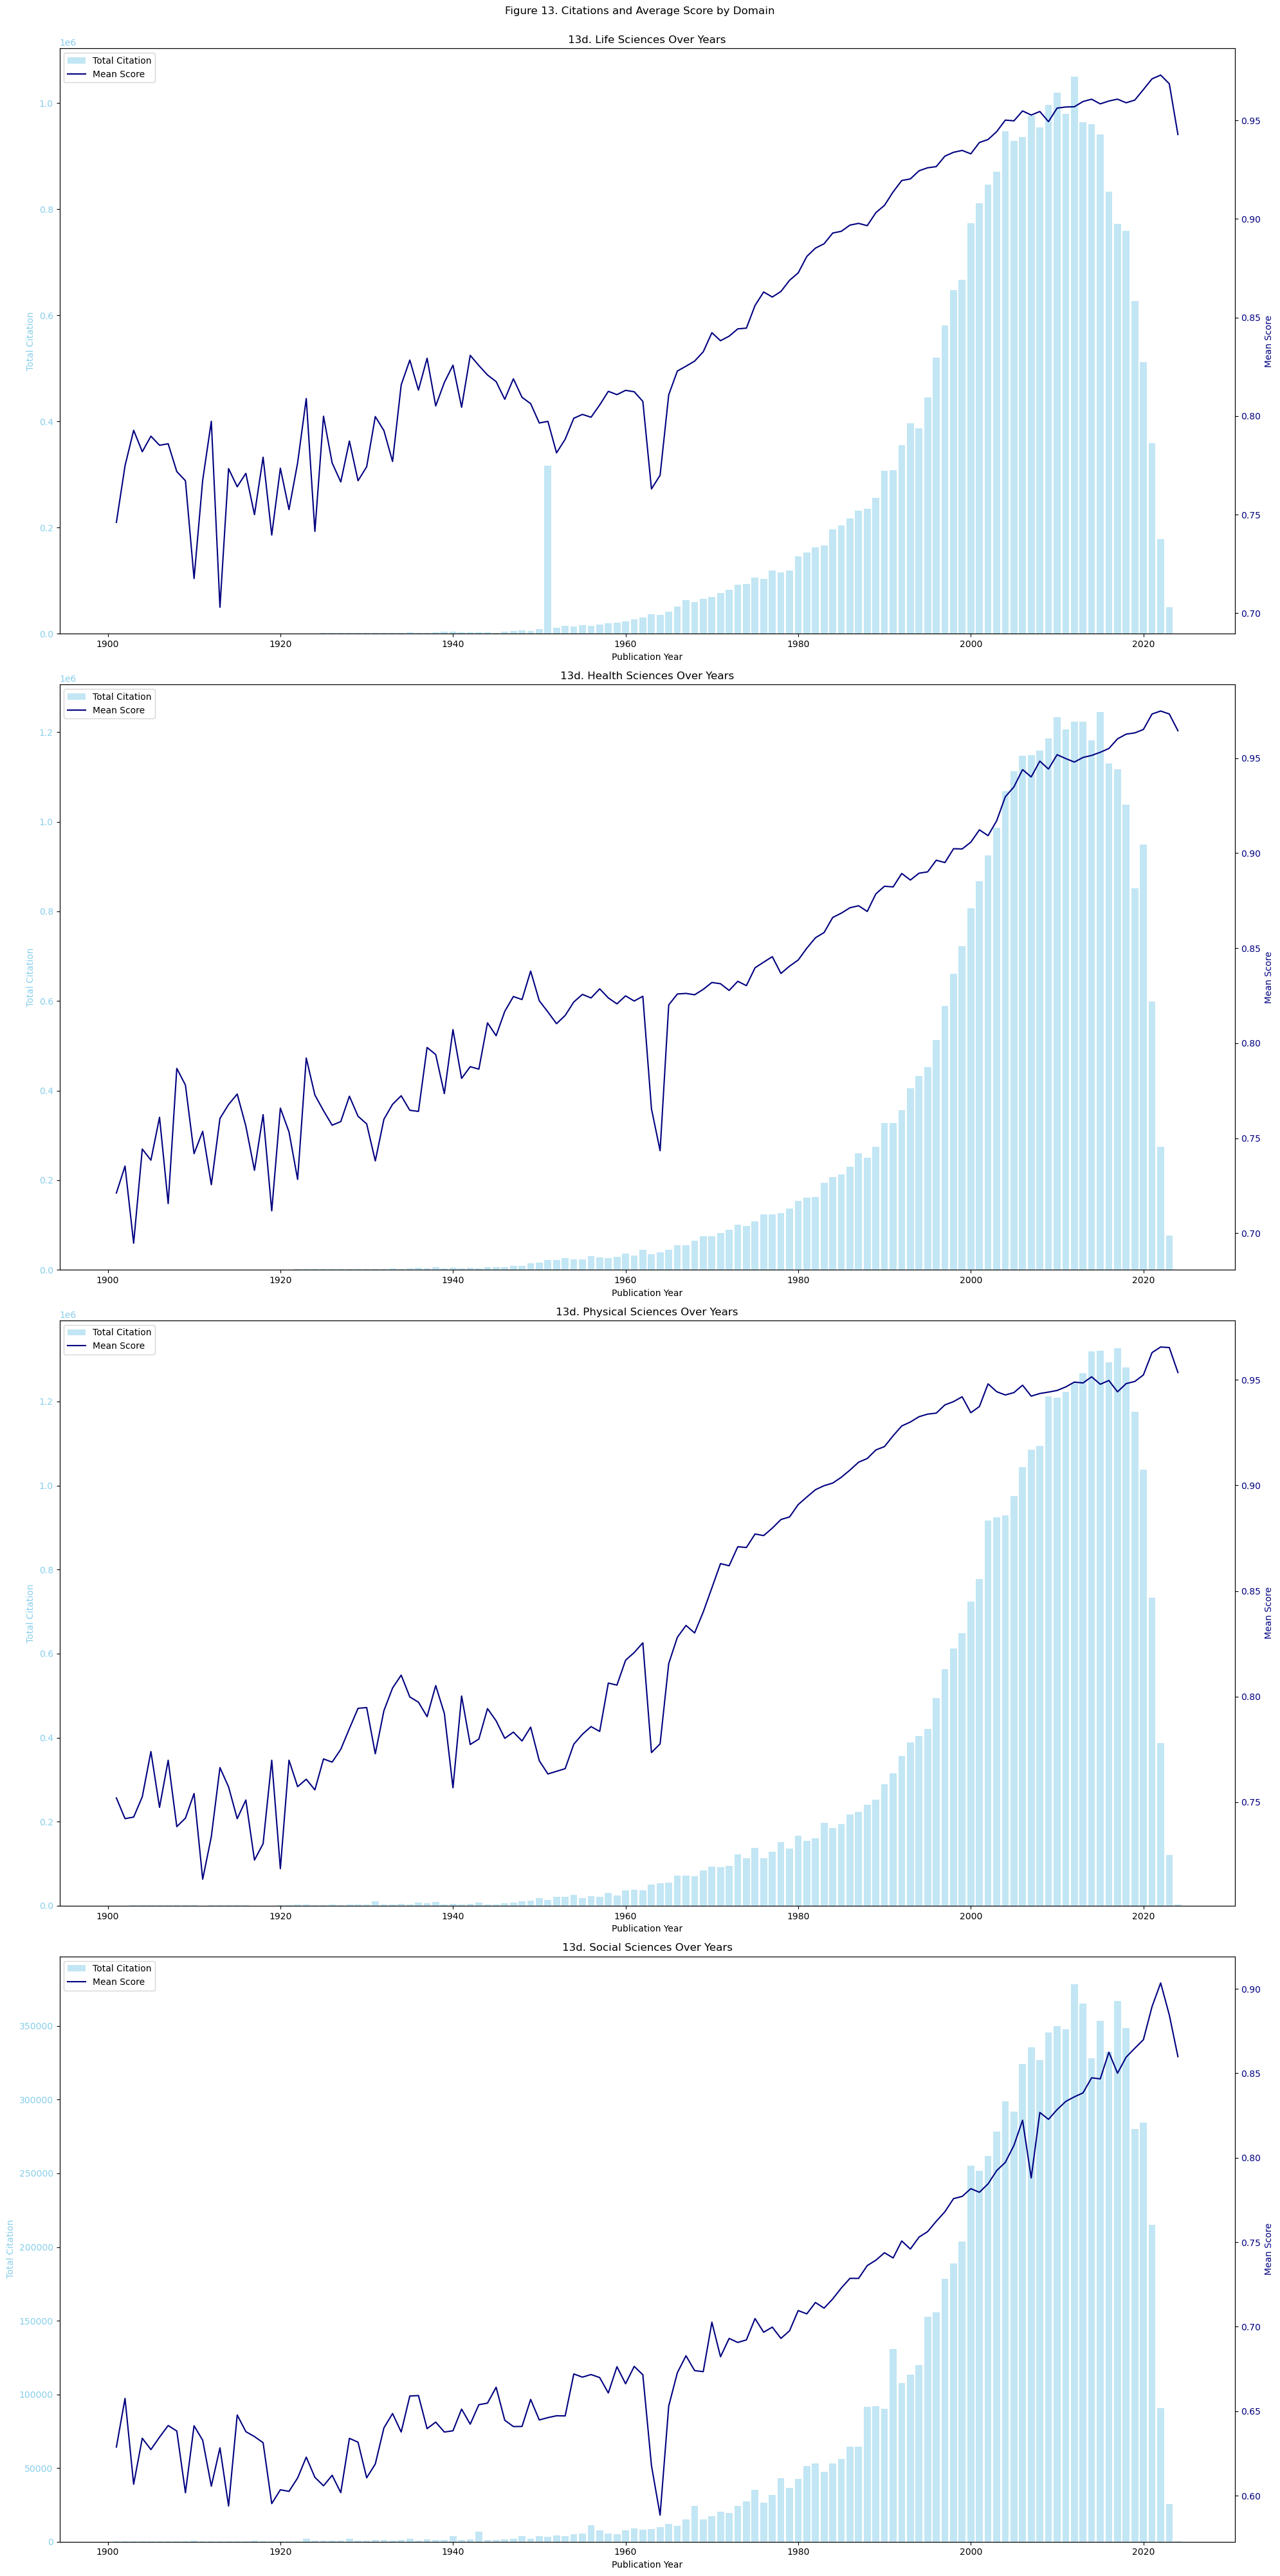

In [45]:
df = df_dt.sort_values('publication_year', ascending=True)
unique_domains = set(df['domain'])
fig, axs = (plt.subplots(nrows=len(unique_domains), ncols=1,
                         figsize=(20, 10 * len(unique_domains))))

# Make 'axs' iterable if there is only one domain
if len(unique_domains) == 1:
    axs = [axs]

for ax, domain in zip(axs, unique_domains):
    # Filter data for the domain
    domain_data = df[df['domain'] == domain]

    # Bar plot for total citations with y-axis on the left
    ax.bar(domain_data['publication_year'], domain_data['total_citation'],
           label='Total Citation', alpha=0.5, color='skyblue')
    ax.set_ylabel('Total Citation', color='skyblue')  # Y-axis on the left for total citation
    ax.tick_params(axis='y', labelcolor='skyblue')
    
    # Create a second y-axis for the mean score
    ax2 = ax.twinx()
    ax2.plot(domain_data['publication_year'], domain_data['mean_score'],
             label='Mean Score', color='navy')
    ax2.set_ylabel('Mean Score', color='navy')  # Y-axis on the right for mean score
    ax2.tick_params(axis='y', labelcolor='navy')

    # Set titles and legends
    ax.set_title(f'13{chr(96+i)}. {domain} Over Years')
    ax.set_xlabel('Publication Year')

    # Legend handling for multiple axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.suptitle('Figure 13. Citations and Average Score by Domain', y=1.0)
plt.tight_layout()
plt.show()

As seen in Figure 13, we can see that the distributions of the total citation counts across all the domains over the years are skewed to the left. This increasing in citation counts over the year is consistent with our observation in Figure 2. More publications could potentially suggest more citations. For the mean score over the years, there are fluctuations but generall an upward trend for all domains. Interestingly, there is a consistent sudden drop of mean score in between 1960-1970. There could be a sudden change or significant event that made OpenAlex to give lower scores to the publications in that time period.

Following that, we can examine the distribution of citation counts in an Institution level.

In [46]:
df_inst = (df_oa.select(F.explode(F.col('inst_id')).alias('inst_id'),
                        'cited_by_count')
           .groupby('inst_id').agg(F.sum('cited_by_count')
                                   .alias('total_citation'))
           .orderBy(F.desc('total_citation')).limit(20).toPandas())

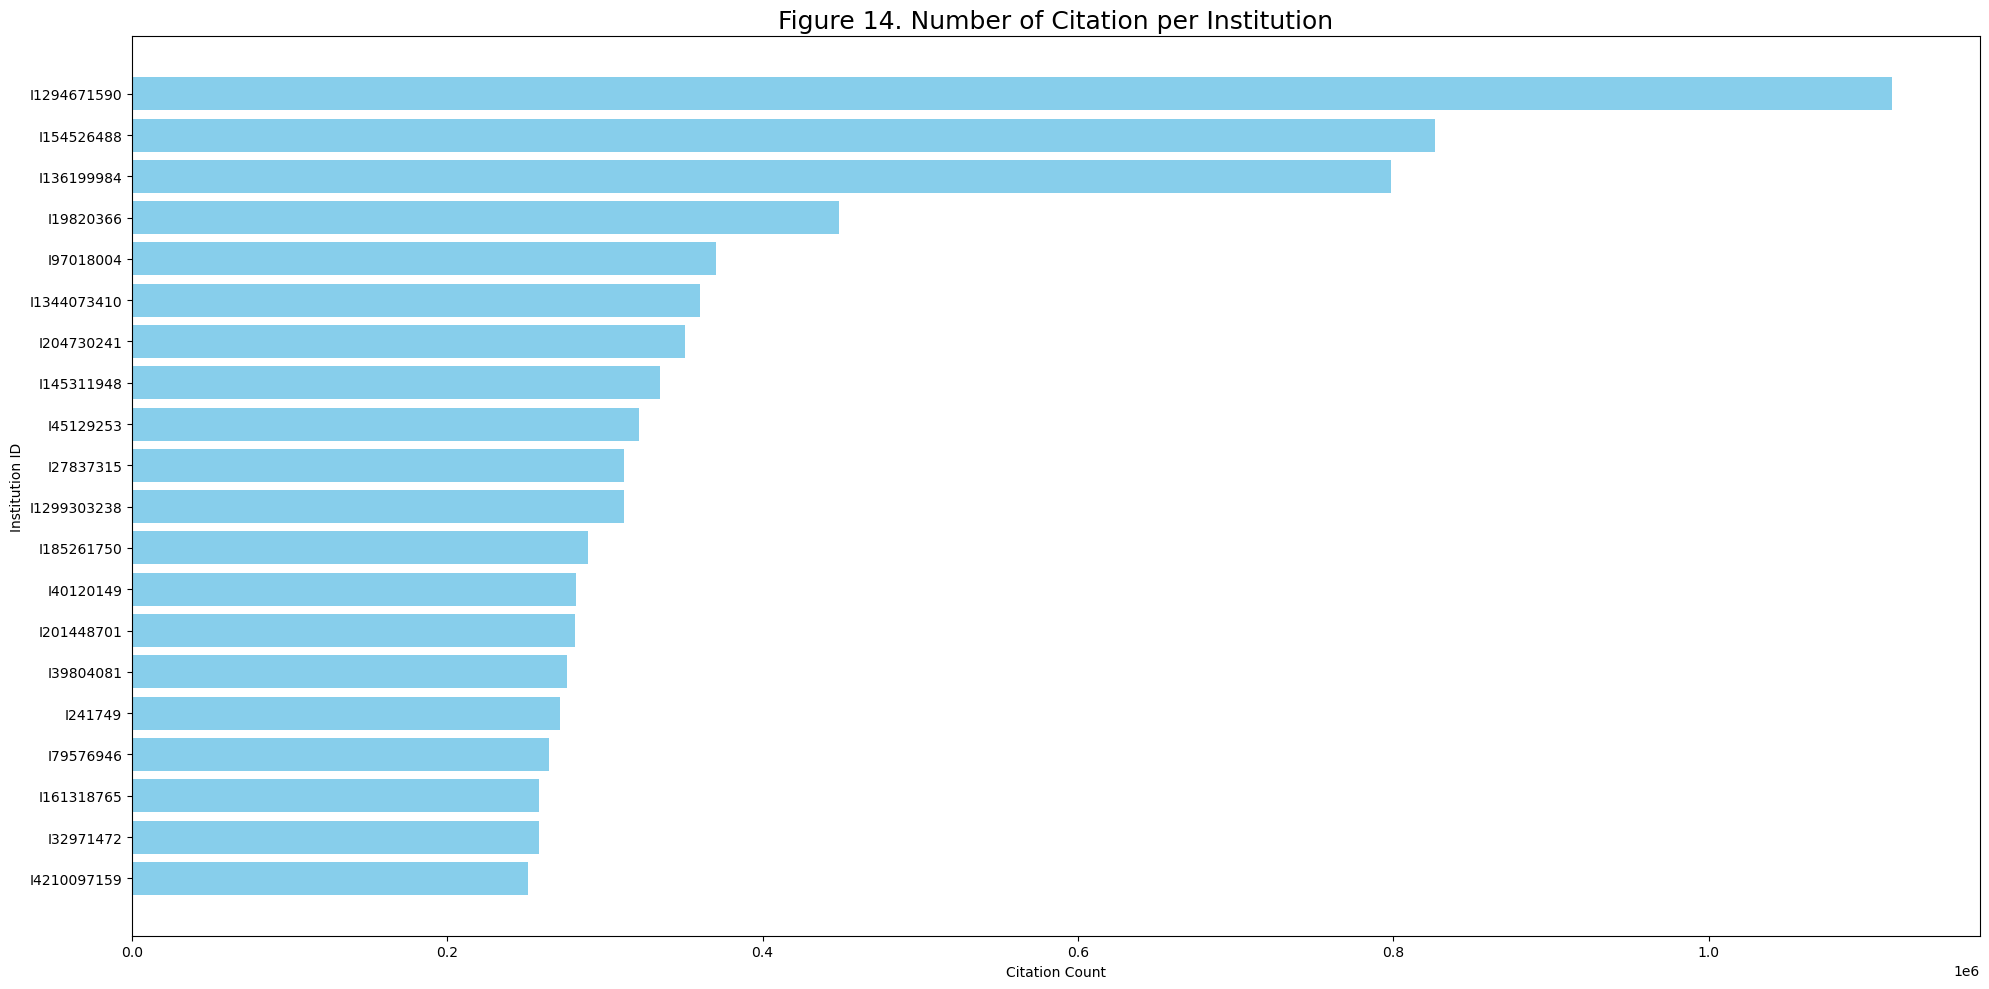

In [47]:
get_plot(df_inst.sort_values('total_citation', ascending=True),
         'Institution ID', 'Citation Count',
         'Figure 14. Number of Citation per Institution', 45, horizontal=True)

We can observe on Figure 14 the similar skewness of the distribution on publication counts (Figure 3). It is consistent with our previous observation on the correlation of citation counts and number of published work. Notably, institution `I1294671590` has a significantly higher citation count, suggesting to a strong academic influence and quality of research output.

To delve deeper, let's explore the quality of works within each field.

In [48]:
inst_list = list(df_inst.iloc[:5, 0])

In [49]:
df_ip = (df_oa.select(F.explode(F.col('inst_id')).alias('inst'), 'field',
                      'cited_by_count', 'primary_score')
         .filter((F.col('inst').isin(inst_list))
            & (F.col('domain').isNotNull()))
         .groupby('inst', 'field')
         .agg(F.sum('cited_by_count').alias('total_citation'),
             F.mean('primary_score').alias('mean_score')).toPandas())

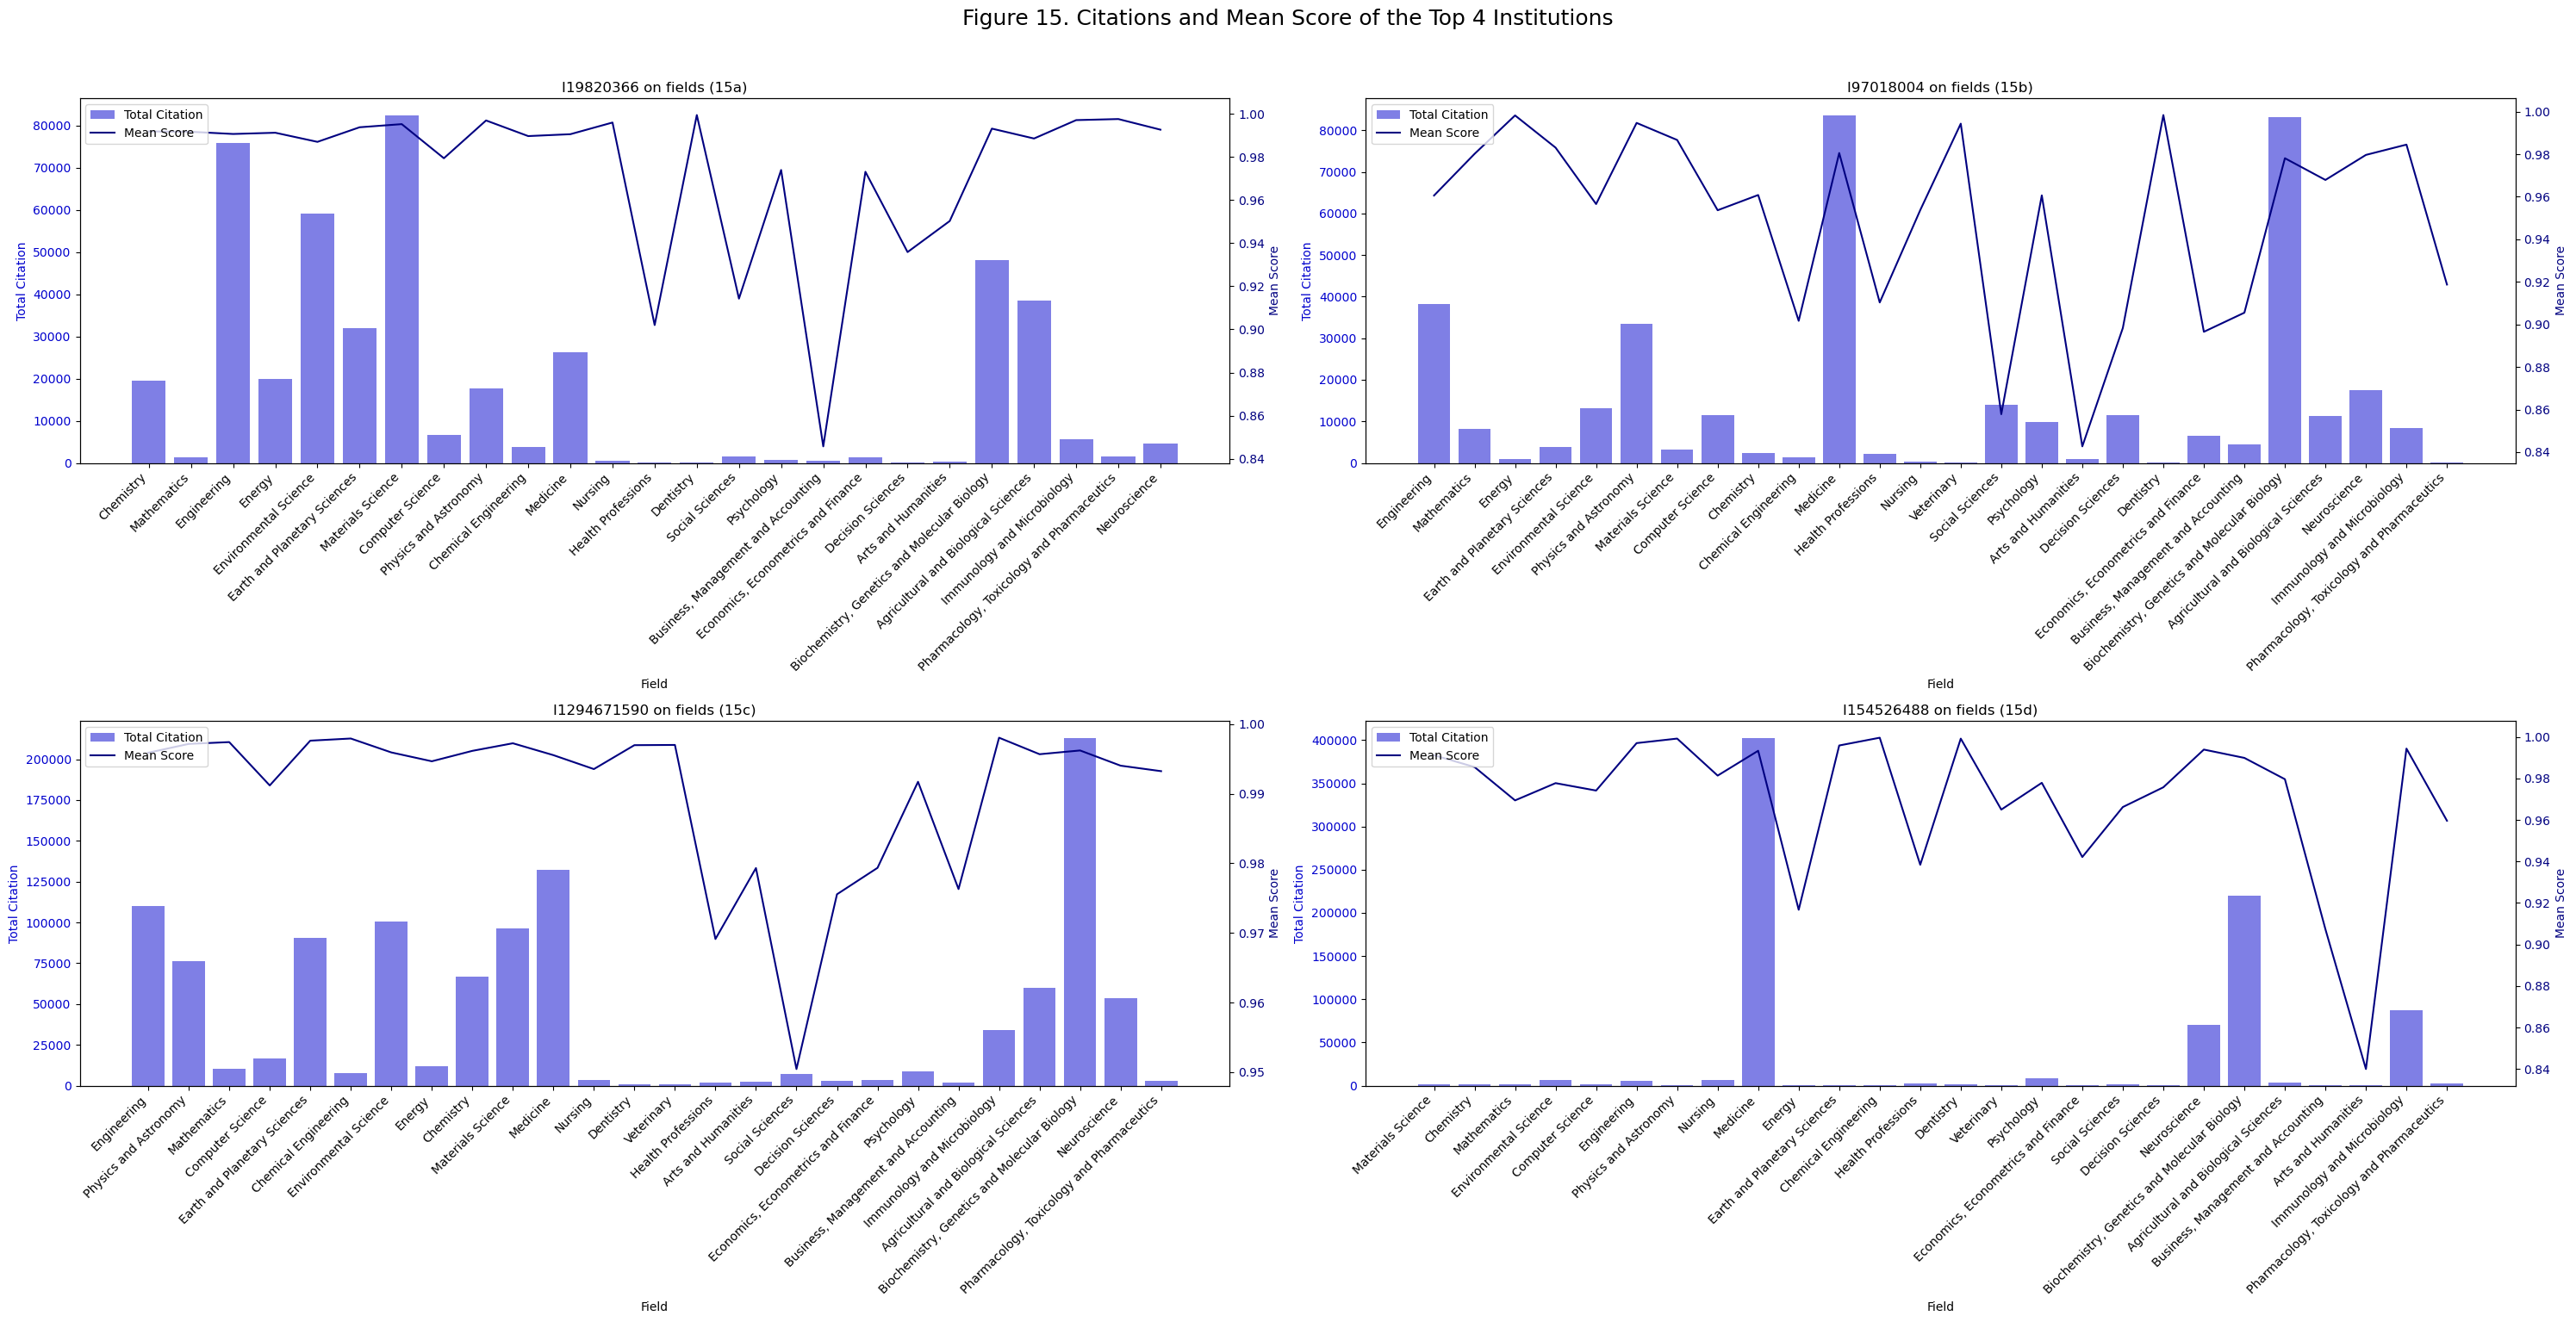

In [50]:
df = df_ip
unique_domains = list(set(df['inst']))
num_domains = len(unique_domains)

# Determine the number of rows and columns for the subplots
nrows, ncols = 2, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 15))

# Flatten axs array for easy iteration
axs = axs.flatten()

for i, (ax, domain) in enumerate(zip(axs, unique_domains)):
    # Filter data for the domain
    domain_data = df[df['inst'] == domain]

    # Bar plot for total citations with y-axis on the left
    ax.bar(domain_data['field'], domain_data['total_citation'],
           label='Total Citation', alpha=0.5, color='mediumblue')
    ax.set_ylabel('Total Citation', color='mediumblue')  
    ax.tick_params(axis='y', labelcolor='mediumblue')
    
    # Create a second y-axis for the mean score
    ax2 = ax.twinx()
    ax2.plot(domain_data['field'], domain_data['mean_score'],
             label='Mean Score', color='navy')
    ax2.set_ylabel('Mean Score', color='navy') 
    ax2.tick_params(axis='y', labelcolor='navy')

    # Set titles and legends
    ax.set_title(f'{domain} on fields (15{chr(97+i)})')
    ax.set_xlabel('Field')

    # Set xticks and xticklabels
    ax.set_xticks(range(len(domain_data['field'])))
    ax.set_xticklabels(domain_data['field'], rotation=45, ha='right')

    # Legend handling for multiple axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Turn off any unused subplots
for j in range(i+1, nrows * ncols):
    fig.delaxes(axs[j])

plt.suptitle('Figure 15. Citations and Mean Score of the Top 4 Institutions',
             y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

Figure 15 showcases the citation counts and mean score of the top instiutions across different domains. Interestingly, we can see that each of the institutions has their own specialty. More citations and higher score are obtained in their respective research areas.

<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Results and Discussion</h1></center>
</div>

The analysis that we have done with the OpenAlex datset had presents us different key findings and patterns across the various fields:
- <b> Most published work is in the Medicine field </b>
    - Among the 26 fields, Medicine had dominated all others with the most published works. This may be expected, since medicine is most likely driven by the global health challenges and continuous support from many industries as medicine is a key part of a us. However despite having the most published work, the mean score for this field is not the best. The Medicine Field had ranked 14th out of 26 which is, which shows also shows that there are a lot of published works that are not above average score. 
<br>
<br>
- <b> Author with the most published work: A9999999999 </b>
    - Based from the different results this author id gave us the most published works, however by looking at the OpenAlex website this author id is not showing any author at all, which made us beleived that this author id are hidden authors, they are not null values rather they just don't want to be recognize
<br>
<br>
- <b> Improving mean score </b>
    - Another interestining finding that we got is that overtime there is really an improvement of mean score, which means that there is an improvement of quality of published works. Moreover when number of citation had peaked between 2000-2020 the mean score of those years were the highest as well.
<br>
<br>
- <b> Consistency in keywords </b>
    - The keywords that we got from the different wordcloud that we created (year 2000, 2020, and 2021) had showed us that there is a consistency of the most common words used in their title, this suggests that there is a persitent focus on investigative and evaluative research across the fields/domains, moreover such consistency also indicates an stable approach on framing research studies.
<br>
<br>
- <b> Citation and Author Productivity </b>
    - Another interesting finding is that, not all authors with the most published work had the highest amount of citation. There is this author with 3 published works only yet garnered the highest number of citation. This indicates that there is a gap between the quality of the published work between the authors. 
<br>
<br>
- <b> Institutional Domain Expertise </b>
    - One of the great highlights, is that different institutions exhibits a domain expertise, which means that some instiution performed well on a specific doman while performing worst on the other. This finding also tell us how these institutions allocate their resources.



<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Conclusion</h1></center>
</div>

Overall, this project did not just uncover different patterns and trends of the academic landscape, rather it also prvides actionable insghts that could benefit all possible stakeholders. Understanding the distribution of publshed works, stakeholders may be able to navigate and improve the academic landspace, promote high-quality resarch, and contiuously contribute to the advancement of human knowledge in all possible fields and domains. Finally, the findings of these project  may be able to lead to more effecient use and allocation of resrouces and support and continuously draft impactful research, may create a future that excels in innovation and advancement in academia. 


<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Moving Forward</h1></center>
</div>

- <b> Predictive Analytics </b>
    - Develope a machine learning model that can predict future trends on these platforms, for instance we may want to predict the number of published works in a certain fields, this could be helpful specially, if we can see a decrease in publishing works.
<br>
<br>
- <b> Text Mining and Analysis </b>
    - Do a sentiment analysis on the published works itself, specially on the abstract, results, and conclusion of the paper to understand the current trend of how published works were being writtend and understood.
<br>
<br>
- <b> Recommender System </b>
    - Being familiar with the academic landscape, we may further this study by creating recommender system that could be based on the authors, institutions, fields, domains, or the different topics of the published works.


<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">Acknowledgement</h1></center>
</div>

We would like to express our sincere gratitude to Professor Christian Alis for his  guidance and support throughout this project.

Additionally, we extend our recognition to ChatGPT for its role as a tool to enhance the quality and clarity of this report.

<div style="background-color: #749FCC; padding: 10px 0;">
<center><h1 style="color: white; font-family:Arial; font-weight:bold">References</h1></center>
</div>

- Khabsa, M., & Giles, C. L. (2014). The Number of Scholarly Documents on the Public Web. *PLoS ONE, 9*(5), e93949. doi:10.1371/journal.pone.00939
- Salloum, S., Dautov, R., Chen, X. et al. Big data analytics on Apache Spark. *Int J Data Sci Anal 1*, 145–164 (2016). https://doi.org/10.1007/s41060-016-0027-9
- OpenAlex. (n.d.). Work Object. Retrieved May 9, 2024, from [openalex doc](https://docs.openalex.org/api-entities/works/work-object)
- OpenAlex Topic Classification Whitepaper. (n.d.). [Google Docs]. Retrieved May 9, 2024, from [google doc](https://docs.google.com/document/d/1bDopkhuGieQ4F8gGNj7sEc8WSE8mvLZS/edit#heading=h.itpsmck1zio0)
- ResearchGate. (n.d.). *What should be the length of the title of a research paper to be submitted for publication?* Retrieved from [researchgate forum](https://www.researchgate.net/post/What_should_be_the_length_of_the_title_of_research_paper_to_be_submitted_for_publication#:~:text=Generally%20speaking%2C%20it%20is%20found,be%20less%20than%2014%20words)
